> <strong>Business Problem </strong> : we have to build a recommendation system that can predict whether a
user will listen to a song again within one month after the user’s very first observable
listening event in KKbox. If the user did not listen to the song again within one month, the
target variable will be 0, and 1 otherwise.
This helps the company to recommend songs to users, to apply rating to songs and
to determine the taste in songs of users.

> <strong>ML formulation </strong> : Building a recommendation system using a collaborative filtering based algorithm with matrix factorization and word embedding.

> <strong> performance metric </strong> : AUC ROC Score<br> ROC Curve is the metric which calculates TPR and FPR at each thresholds and plots them and AUC ROC score is the area under the curve of ROC curve. This metric works best when data is balanced. while other metrics like F1-Score calculates precision and recall at a particular thresholds and considers predicted classes while AUC ROC Curve uses predicted scores. This predicted scores and thresholds helps us in determing the correct threshold that should be choosen for evaluation.<br><br>
 while Plotting ROC Curve we make use of ordered predicted scores, we make use of each predicted score as a threshold and calculate TPR and FPR at each threshold. Then we plot ROC Curve on collected TPR and FPR values obtained by thresholding over predicted scores.<br><br>
The Point at which we have high TPR and low FPR this point can be used as right threshold at the time of inference. compared to f1 score and accuracy this metrics uses 0.5 as there threshold which is not right all the time.<br><br>
When your predictions overfit :<br>
ie y_true = [0,1,0,1,1,0,1,0,0,1] <br>
and y_pred = [1,1,1,1,1,1,1,1,1,1] (M1)<br>
as well as y_pred = [0,0,0,0,0,0,0,0,0,0] (M2)<br>
In this AUC(M1) is equal to AUC(M2) because when we apply thresholding on both model then TPR and FPR in the both the cases will be same. So AUC ROC Score doesn't make sense here. so we should apply F1-Score when we biased or overfitted or class imbalance problem<br>
when y_true and y_pred are inverted auc score varies from 0 to 0.5 this problem arises due to invertion of labels. can be solved by just inverting labels.<br>
> <strong> Calculation of F1-Score</strong> :<br>
threshold = 0.5<br>
precision = TP/(TP+FP) <br>
recall = TP/(TP+FN) <br>
F1-Score = 2xprecisionxRecall/(Precision+Recall)<br>

><Strong> Calculation of ROC Curve </strong> :<br>
   1.sort scores<br>
   2.for threshold in scores:<br>
       calculate TPR and FPR<br>
       list.add(TPR, FPR)<br>
   3.Plot TPR vs FPR curve<br>
   4.Calculate Area under the curve.<br>


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('train.csv')
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [2]:
songs = pd.read_csv('songs.csv')
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [3]:
members = pd.read_csv('members.csv')
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


# EDA

In [5]:
df['msno'].unique().shape[0], df['song_id'].unique().shape[0], df.shape[0]

(30755, 359966, 7377418)

In [6]:
len(set(df['song_id'].unique()).intersection(set(songs['song_id'].unique())))

359914

In [7]:
len(set(df['msno'].unique()).intersection(set(members['msno'].unique())))

30755

> <strong>Conclusion : </strong> <br>1.  Out Of 359966 song_ids we have only information of 359914  song_ids. <br> 2. Out Of 30755 members we have all information of 30755 members. 

In [4]:
df = df.merge(members, on = 'msno', how='left')
df = df.merge(songs, on = 'song_id', how = 'left')

In [9]:
df.describe()

,target,city,bd,registered_via,registration_init_time,expiration_date,song_length,language
count,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377304e+06,7.377268e+06
mean,5.035171e-01,7.511399e+00,1.753927e+01,6.794068e+00,2.012810e+07,2.017157e+07,2.451210e+05,1.860933e+01
std,4.999877e-01,6.641624e+00,2.155447e+01,2.275774e+00,3.017281e+04,3.869831e+03,6.734471e+04,2.117681e+01
min,0.000000e+00,1.000000e+00,-4.300000e+01,3.000000e+00,2.004033e+07,1.970010e+07,1.393000e+03,-1.000000e+00
25%,0.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,2.011070e+07,2.017091e+07,2.147260e+05,3.000000e+00
50%,1.000000e+00,5.000000e+00,2.100000e+01,7.000000e+00,2.013102e+07,2.017093e+07,2.418120e+05,3.000000e+00
75%,1.000000e+00,1.300000e+01,2.900000e+01,9.000000e+00,2.015102e+07,2.017101e+07,2.721600e+05,5.200000e+01
max,1.000000e+00,2.200000e+01,1.051000e+03,1.300000e+01,2.017013e+07,2.020102e+07,1.085171e+07,5.900000e+01


In [30]:
import re
df['artist_name_processed'] = df['artist_name'].astype(str).apply(lambda x: ' '.join(re.sub('[^a-zA-Z ]',' ', x).lower().split()[:3]))
obj = df['artist_name_processed'].astype('category').cat
artist_map = dict(enumerate(obj.categories))
df['artist_name_processed'] = obj.codes

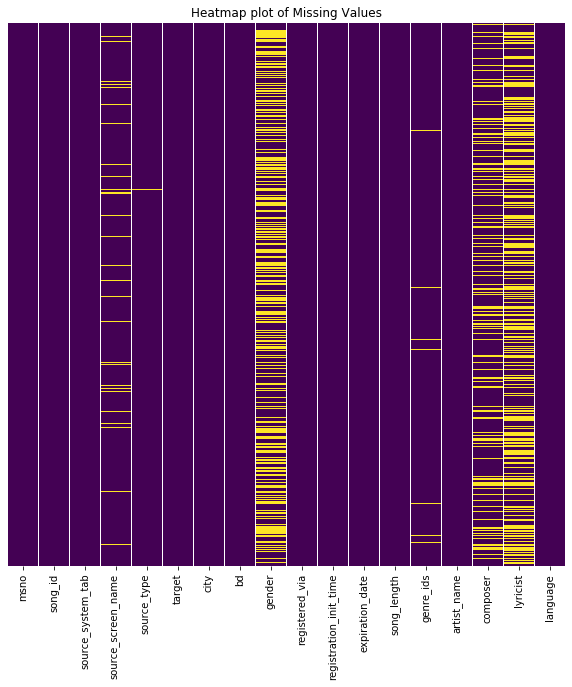

In [10]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis', yticklabels = False)
plt.title('Heatmap plot of Missing Values')
plt.show()

> <strong>Conclusion : </strong> Gender, composer and lyricist are highly sparsed ie. they have high missing value rate.
So, we need to handle them carefully.

<h2> 1.1 EDA Of Categorical Variables

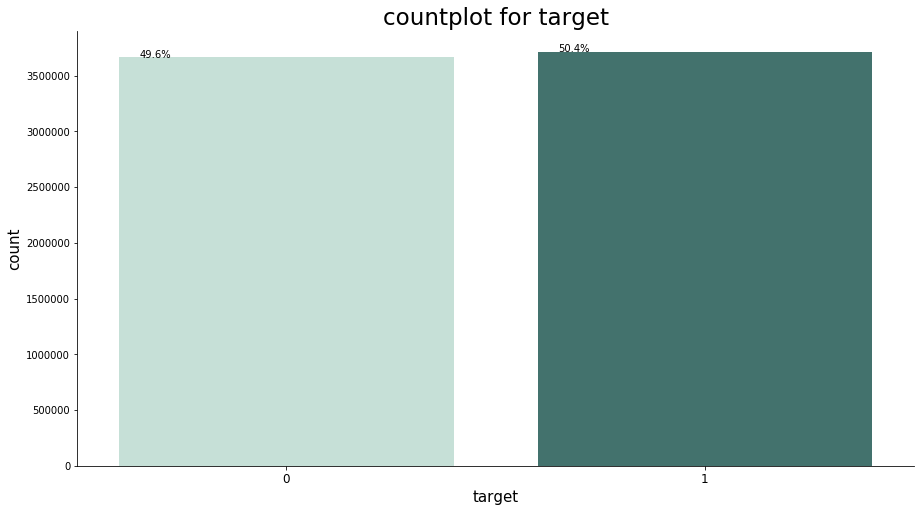

In [209]:
a = pd.DataFrame(df.groupby('target').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'target',y = 0, data = a, palette='ch:2.5,-.10,dark=.4')
plt.xticks(fontsize = 12)
plt.xlabel('target', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('countplot for target', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim </strong> :Plot for determining the distribution of Target variable.

> <strong>Conclusion : </strong> Dataset is balanced for taget variable.

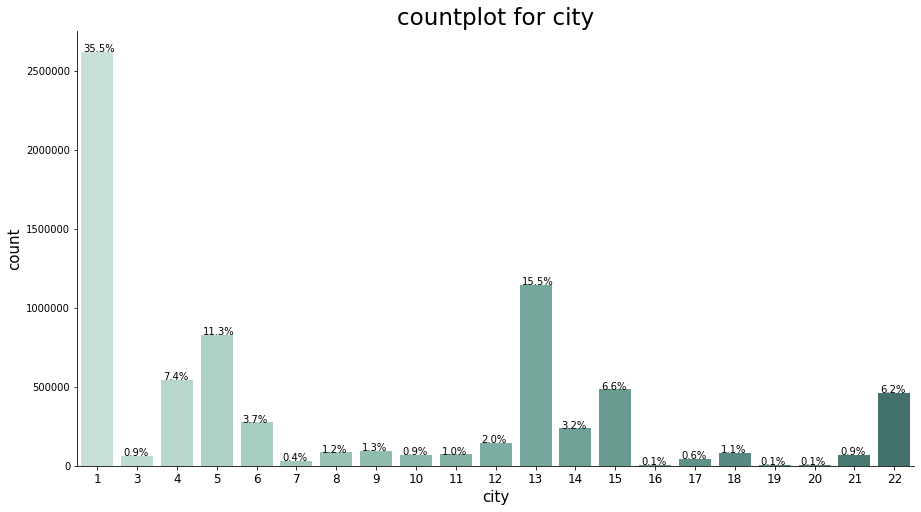

In [123]:
a = pd.DataFrame(df.groupby('city').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'city',y = 0, data = a, palette='ch:2.5,-.10,dark=.4')
plt.xticks(fontsize = 12)
plt.xlabel('city', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('countplot for city', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), fontsize = 10)
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim for city  </strong> :Plot for determining the distribution of users according to cities.

> <strong> Conclusion for city : </strong><br> 1. There are majority of users using KKBox app from city 1 and 13. <br> 2. City 1 and 13 must be cities with high population as there are more users in city.<br>

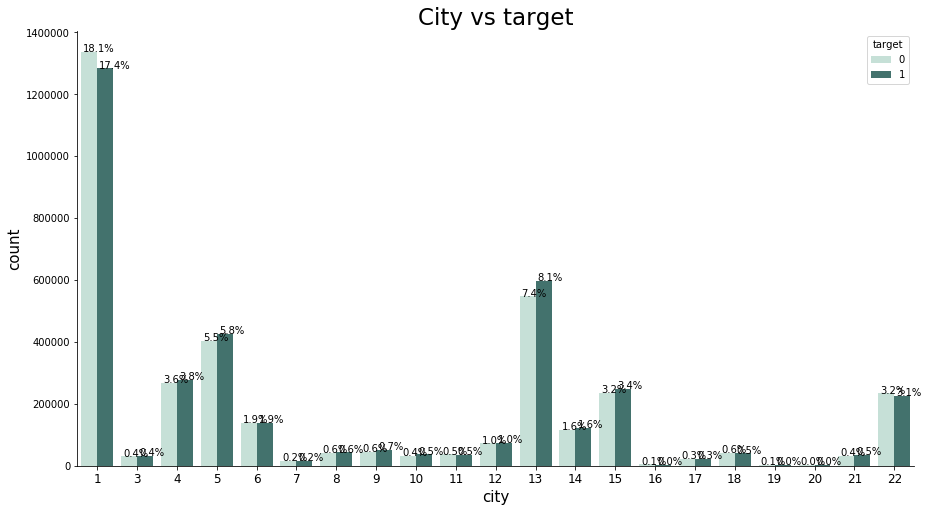

In [8]:
a = pd.DataFrame(df.groupby(['city', 'target']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'city',y = 0, data = a, hue = 'target', palette='ch:2.5,-.10,dark=.4')
plt.xticks(fontsize = 12)
plt.xlabel('city', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('City vs target', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), fontsize = 10)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

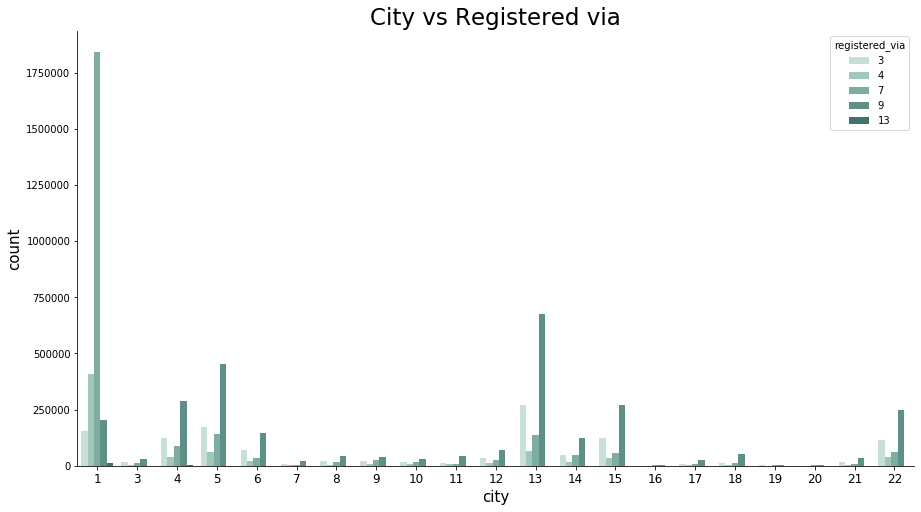

In [25]:
a = pd.DataFrame(df.groupby(['city', 'registered_via']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'city',y = 0, data = a, hue = 'registered_via', palette='ch:2.5,-.10,dark=.4')
plt.xticks(fontsize = 12)
plt.xlabel('city', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('City vs Registered via', fontdict = {'fontsize': 23})

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim for city vs registered via </strong> :Plot for determining the distribution of users according to cities and mode through which they have registered.

> <strong> Conclusion for city vs registered via: </strong><br>1. Except city 1 all cities mostly prefer to registration mode as  13 only city 1 prefer registration mode 7. 

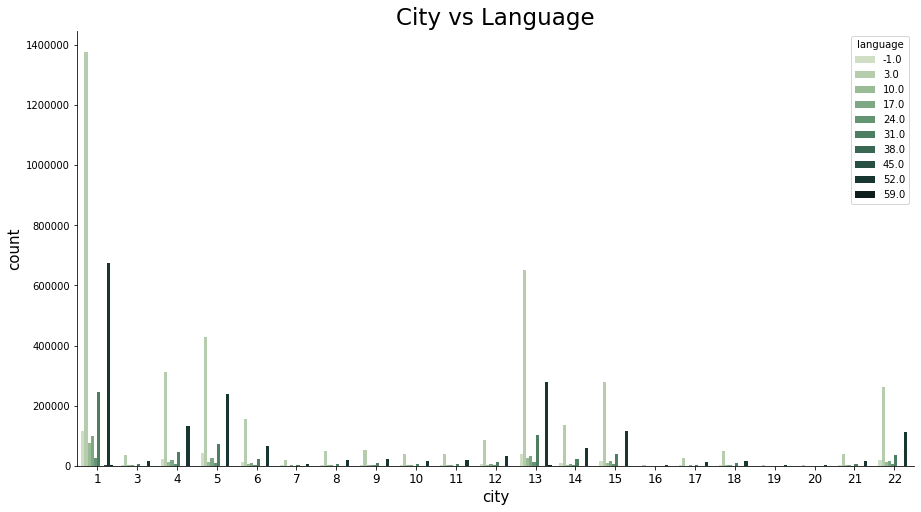

In [28]:
a = pd.DataFrame(df.groupby(['city', 'language']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'city',y = 0, data = a, hue = 'language', palette='ch:2.5,-.30,dark=.1')
plt.xticks(fontsize = 12)
plt.xlabel('city', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('City vs Language', fontdict = {'fontsize': 23})

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim for city vs Language </strong> :Plot for determining the most prefered languages of city..

> <strong> Conclusion for city vs Language: </strong><br> 1. Most popular two languages are 3.0 and 59.0 .<br> 2. All cities belongs to same country.

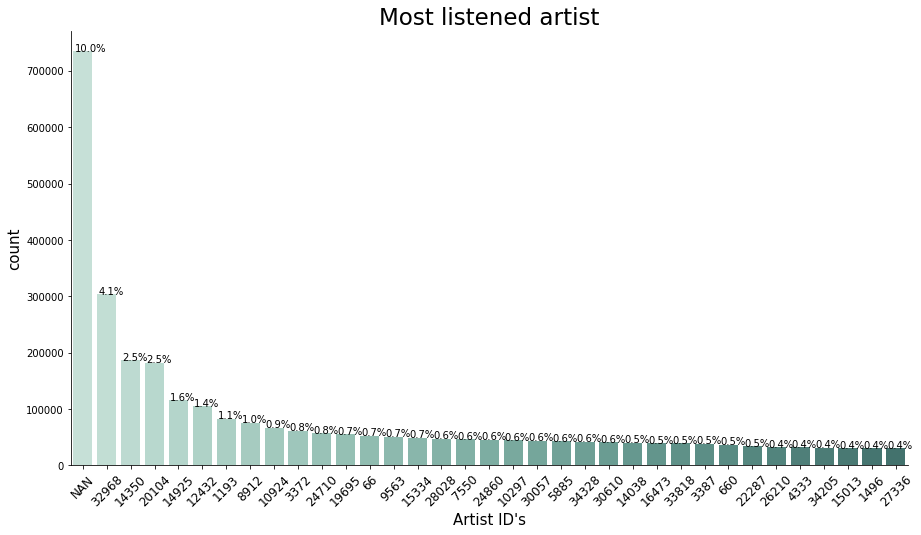

In [78]:
a = pd.DataFrame(df.groupby('artist_name_processed').size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a.iloc[:35, :]
a.replace(0, 'NAN', inplace = True)
plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'artist_name_processed',y = 0, data = a, palette='ch:2.5,-.10,dark=.4')
plt.xticks(rotation= 45, fontsize = 12)
plt.xlabel('Artist ID\'s', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('Most listened artist', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), fontsize = 10)
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [86]:
from prettytable import PrettyTable 

myTable = PrettyTable(["Artist ID", "Artist Name", "Artist  ID ", "Artist  Name"]) 
a = np.array(a)
for i in range(1, a.shape[0], 2):
    myTable.add_row([a[i][0], artist_map[a[i][0]], a[i+1][0], artist_map[a[i+1][0]]]) 
print(myTable)

+-----------+------------------+-------------+--------------+
| Artist ID |   Artist Name    | Artist  ID  | Artist  Name |
+-----------+------------------+-------------+--------------+
|   32968   | various artists  |    14350    |   jay chou   |
|   20104   |      mayday      |    14925    |    jj lin    |
|   12432   |       hebe       |     1193    |     amei     |
|    8912   |    eason chan    |    10924    |    g e m     |
|    3372   |     bigbang      |    24710    |   r chord    |
|   19695   |      maroon      |      66     |    a lin     |
|    9563   |       eric       |    15334    |  jolin tsai  |
|   28028   |    sodagreen     |     7550    |    della     |
|   24860   |   rainie yang    |    10297    |  fish leong  |
|   30057   | the chainsmokers |     5885    |  claire kuo  |
|   34328   |     yoga lin     |    30610    | the last day |
|   14038   |    jam hsiao     |    16473    |   kenji wu   |
|   33818   |   william wei    |     3387    |     bii      |
|    660

> <strong> Aim for Artist Name</strong> :Plot for determining the most Listened artist.

> <strong> Conclusion for Artist Name: </strong><br> 1. Most popular two Artist are jay chou and mayday. <br> 2. There are 10% of artist names are missing. <br> 3. 4.1% of Artists are unknown with given name as "various artists".

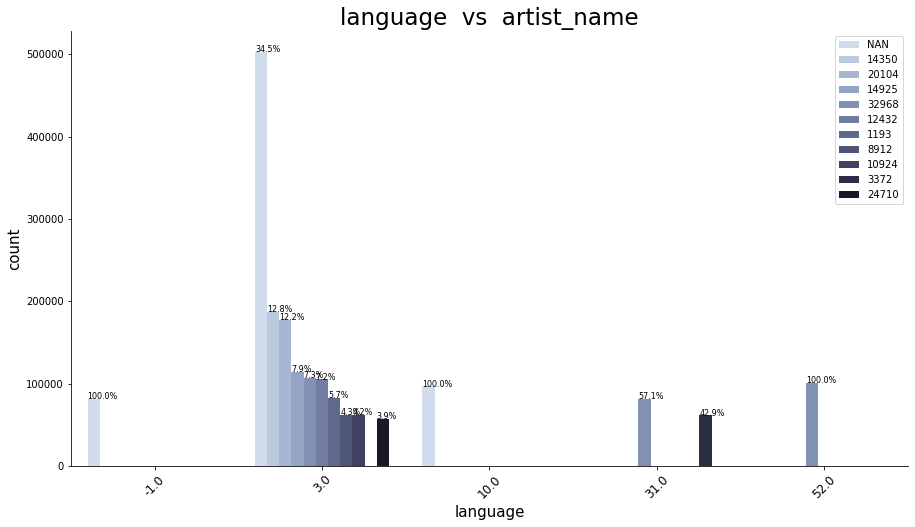

In [53]:
a = pd.DataFrame(df.groupby(['language', 'artist_name_processed']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a.iloc[:15, :]
a.replace(0, 'NAN', inplace = True)
b = np.array(a.groupby('language')[0].sum().reset_index())
plt.figure(figsize = (15,8))
ax = sns.barplot(hue= 'artist_name_processed',y = 0, data = a, x = 'language', palette='ch:30.0,-.10,dark=.10')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('language', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('language  vs  artist_name', fontdict = {'fontsize': 23})
plt.legend(loc = 'upper right')
count = 0
for p in ax.patches:
    if count == b.shape[0]:
            count = 0
    ax.annotate('{:.1f}%'.format( 100*p.get_height()/b[count, 1]), (p.get_x(), p.get_height()+0.5), fontsize = 8)
    count+=1
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim for Artist Name vs Language</strong> :Plot for determining the Most popular artists in Language.

> <strong> Conclusion for Artist Name  vs  Language: </strong><br> 1. jay chou and mayday are two most popular singers in language 3.0 <br> 2. bigbang is the most popular singers in language 31.0 <br> 3. Maroon is the most popular artist in language 52.0 <br> 4. All the artist names in language -1.0 and 10.0 are missing.<br>

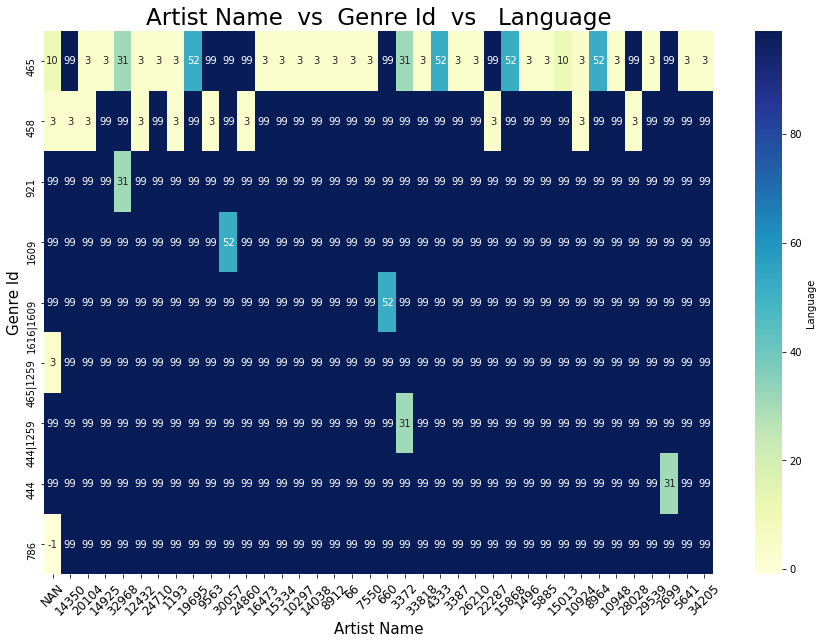

In [12]:
a = pd.DataFrame(df.groupby(['language', 'genre_ids', 'artist_name_processed']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a.iloc[:50, :]
a.replace(0, 'NAN', inplace = True)
f = pd.DataFrame(columns = a['genre_ids'].unique(), index = a['artist_name_processed'].unique())
a = np.array(a)
for i in a:
    f[i[1]].loc[i[2]] = i[0]
f.replace(np.nan, 99, inplace = True)
plt.figure(figsize = (15, 10))
sns.heatmap(f.T, annot = True, cmap = 'YlGnBu',cbar_kws={'label': 'Language'})
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Artist Name', fontdict = {'fontsize':15})
plt.ylabel('Genre Id', fontdict = {'fontsize':15})
plt.title('Artist Name  vs  Genre Id  vs   Language', fontdict = {'fontsize': 23})
plt.show()

> <strong> Aim for Artist Name vs Genrr ID  vs  Language</strong> :Plot for determining the Most popular artists of particular genre in particular Language.

> <strong> Conclusion for Artist Name vs Genre ID  vs  Language: </strong><br> 1. Jay Chou sings only with genre id 458 and language 3.0 .<br> 2. mayday sings only in 458 and 465 genre with only language 3.0 . <br> 3. The Chainsmoker is the only artist which uses genre id 1609 with language 52.0 <br> 4. Alan Walker is the only artist which uses genre id  1616 and 1609 with languages 52.0.<br> 

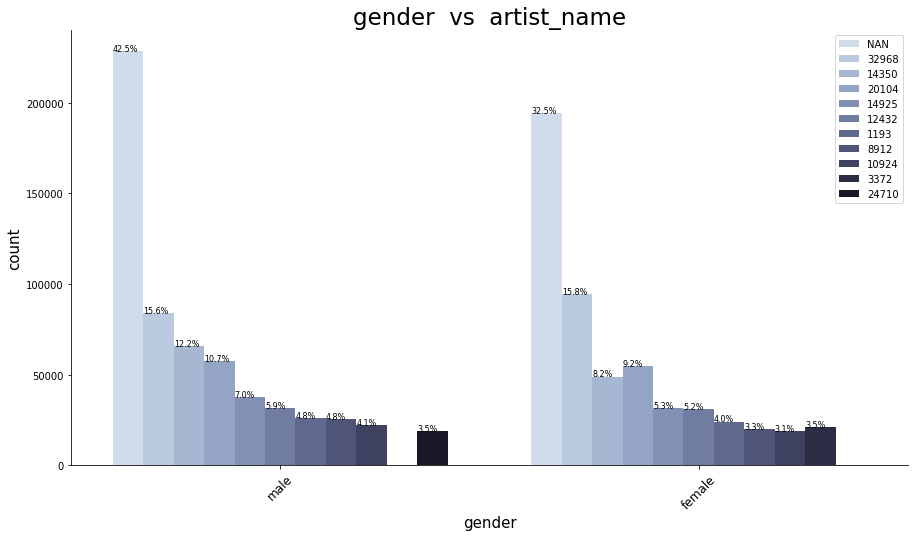

In [18]:
a = pd.DataFrame(df.groupby(['gender', 'artist_name_processed']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a.iloc[:20, :]
a.replace(0, 'NAN', inplace = True)
b = np.array(a.groupby('gender')[0].sum().reset_index())
plt.figure(figsize = (15,8))
ax = sns.barplot(hue= 'artist_name_processed',y = 0, data = a, x = 'gender', palette='ch:30.0,-.10,dark=.10')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('gender', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('gender  vs  artist_name', fontdict = {'fontsize': 23})
plt.legend(loc = 'upper right')
count = 0
for p in ax.patches:
    if count == b.shape[0]:
            count = 0
    ax.annotate('{:.1f}%'.format( 100*p.get_height()/b[count, 1]), (p.get_x(), p.get_height()+0.5), fontsize = 8)
    count+=1
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim for Artist Name vs Gender</strong> :Plot for determining the Most popular artists among males and females.

> <strong> Conclusion for Artist Name vs Gender : </strong><br> 1. jay chou is more popular in males than in females. <br> 2. Bigbang is only popular in males and not in females. <br> 3. Sodagreen is only popular in females and not in males.

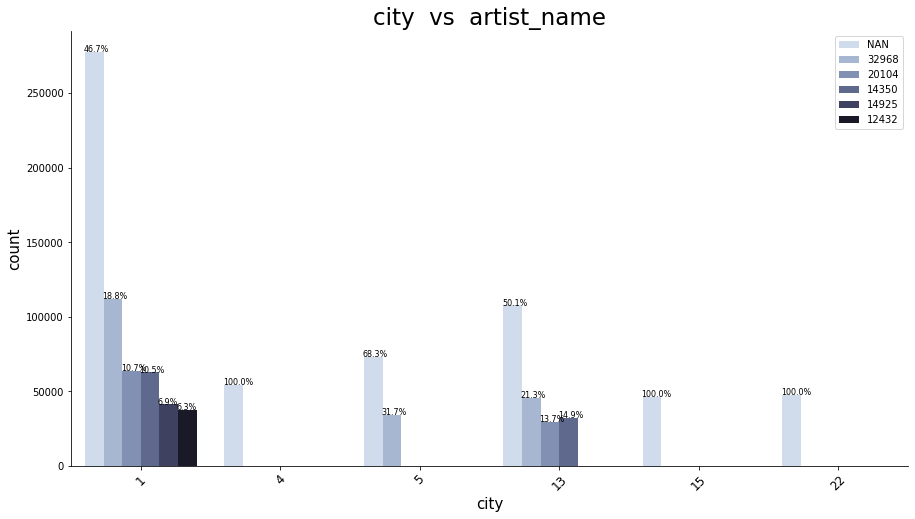

In [54]:
a = pd.DataFrame(df.groupby(['city', 'artist_name_processed']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a.iloc[:15, :]
a.replace(0, 'NAN', inplace = True)
b = np.array(a.groupby('city')[0].sum().reset_index())
plt.figure(figsize = (15,8))
ax = sns.barplot(hue= 'artist_name_processed',y = 0, data = a, x = 'city', palette='ch:30.0,-.10,dark=.10')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('city', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('city  vs  artist_name', fontdict = {'fontsize': 23})
plt.legend(loc = 'upper right')
count = 0
for p in ax.patches:
    if count == b.shape[0]:
            count = 0
    ax.annotate('{:.1f}%'.format( 100*p.get_height()/b[count, 1]), (p.get_x()-0.01, p.get_height()+1), fontsize = 8)
    count+=1
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim for Artist Name vs City</strong> :Plot for determining the Most popular artists in City.

> <strong> Conclusion for Artist Name vs City: </strong><br> 1. jay chou and mayday are two most popular artist in city 1 and 13. <br> 2. All the artist names in city 4, 6, 15 and 22 are missing.<br>

+-----------+-------------+----------+--------+-------------+------------------+-----------+--------+
| Artist ID | Artist Name | Genre ID | Count  | Artist  ID  |   Artist  Name   | Genre  ID | Count  |
+-----------+-------------+----------+--------+-------------+------------------+-----------+--------+
|   14350   |   jay chou  |   458    | 168959 |    32968    | various artists  |    921    | 154734 |
|   14925   |    jj lin   |   465    | 108495 |    32968    | various artists  |    465    | 61923  |
|   20104   |    mayday   |   458    | 54941  |    12432    |       hebe       |    458    | 52653  |
|   12432   |     hebe    |   465    | 52293  |    24710    |     r chord      |    465    | 51700  |
|    1193   |     amei    |   465    | 51292  |    19695    |      maroon      |    465    | 50546  |
|    9563   |     eric    |   458    | 48721  |    30057    | the chainsmokers |    1609   | 44149  |
|   24860   | rainie yang |   458    | 43097  |     8912    |    eason chan    |  

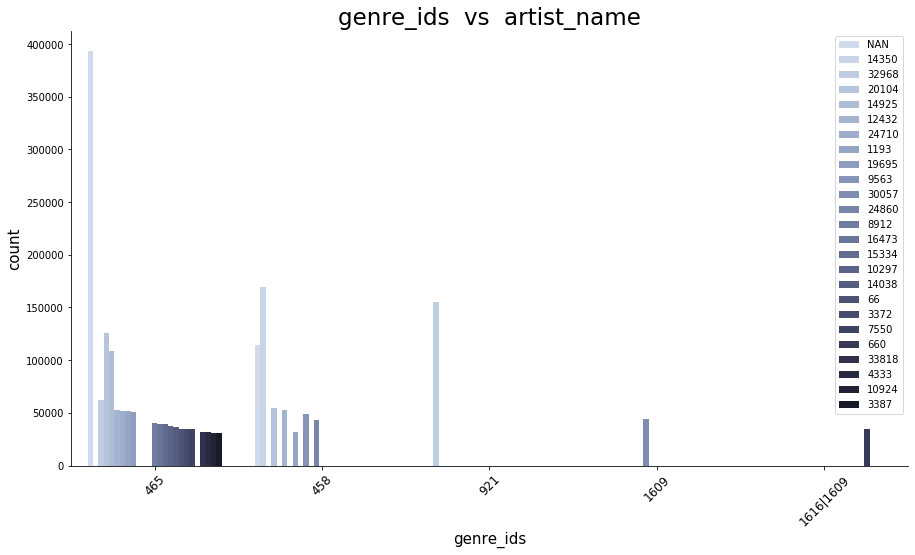

In [37]:
a = pd.DataFrame(df.groupby(['genre_ids', 'artist_name_processed']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a.iloc[:30, :]
a.replace(0, 'NAN', inplace = True)
b = np.array(a.groupby('genre_ids')[0].sum().reset_index().sort_values(by = 0, ascending = False))
plt.figure(figsize = (15,8))
ax = sns.barplot(hue= 'artist_name_processed',y = 0, data = a, x = 'genre_ids', palette='ch:30.0,-.10,dark=.10')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('genre_ids', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('genre_ids  vs  artist_name', fontdict = {'fontsize': 23})
plt.legend(loc = 'upper right')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
from prettytable import PrettyTable 

myTable = PrettyTable(["Artist ID", "Artist Name", "Genre ID", "Count", "Artist  ID ", "Artist  Name",  "Genre  ID", "Count "]) 
a = np.array(a)
for i in range(1, a.shape[0], 2):
    try:
        myTable.add_row([a[i][1], artist_map[a[i][1]], a[i][0], a[i][2], a[i+1][1], artist_map[a[i+1][1]], a[i+1][0], a[i+1][2]])
    except:
        pass
print(myTable)

plt.show()

> <strong> Aim for Artist Name vs genre ids</strong> :Plot for determining the Most popular artists among genre.

> <strong> Conclusion for Artist Name vs genre ids: </strong><br> 1. mayday and jj lin are most popular artists in genre id 465. <br> 2. jay chou and mayday are most popular artists in genre id 458. <br> 3. The Chainsmoker is the only popular artist in genre id 1609.<br> 4. Alan walker is popular among genre id 1616 and 1609.

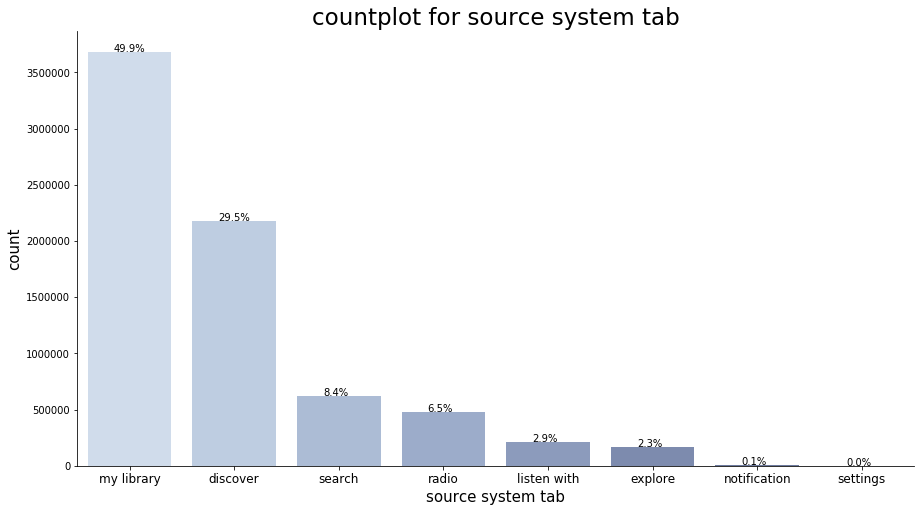

In [192]:
a = pd.DataFrame(df.groupby('source_system_tab').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_system_tab',y = 0, data = a, palette='ch:30.0,-.10,dark=.4')
plt.xticks(fontsize = 12)
plt.xlabel('source system tab', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('countplot for source system tab', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/df.shape[0]), (p.get_x()+0.25, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim for source system tab </strong> :Plot for determining the distribution of Source system tab used by users in KKBox app while listening songs.

> <strong> Conclusion for source system tab : </strong> <br>1.There are majority of users using KKBox app by using local storage ie my library. <br> 2. Most of the peoples discover songs using discover, search then they try to use there my library for playing songs.

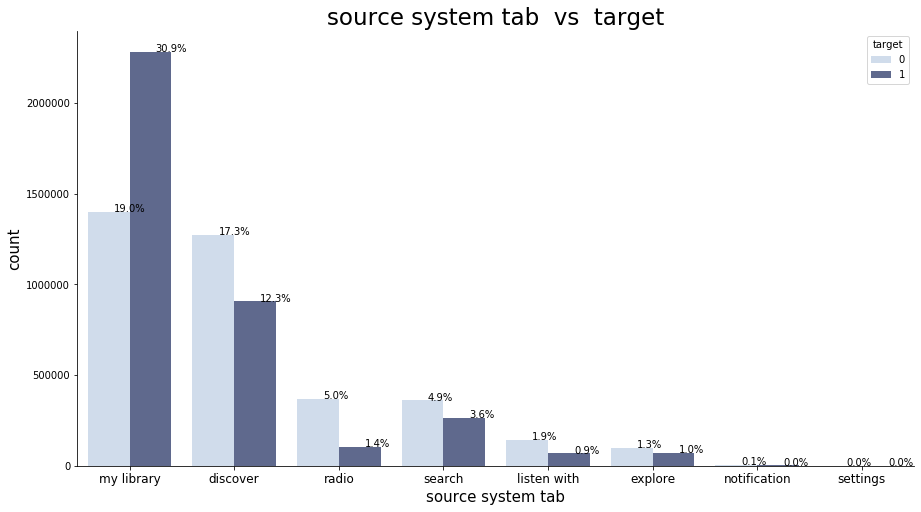

In [33]:
a = pd.DataFrame(df.groupby(['source_system_tab', 'target']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_system_tab',y = 0, data = a, hue = 'target', palette='ch:30.0,-.10,dark=.4')
plt.xticks(fontsize = 12)
plt.xlabel('source system tab', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('source system tab  vs  target', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/df.shape[0]), (p.get_x()+0.25, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim for target vs source system tab</strong> : Plot for determining the distribution of Source system tab used by users in KKBox app while listening songs with respect to variation in target variable.

> <strong>Conclusion for target vs source system tab : </strong> <br> 1. 30.9% of users listening songs repeatedly from my library. <br> 2. 17.3% of users discovered songs where not listend more than once.

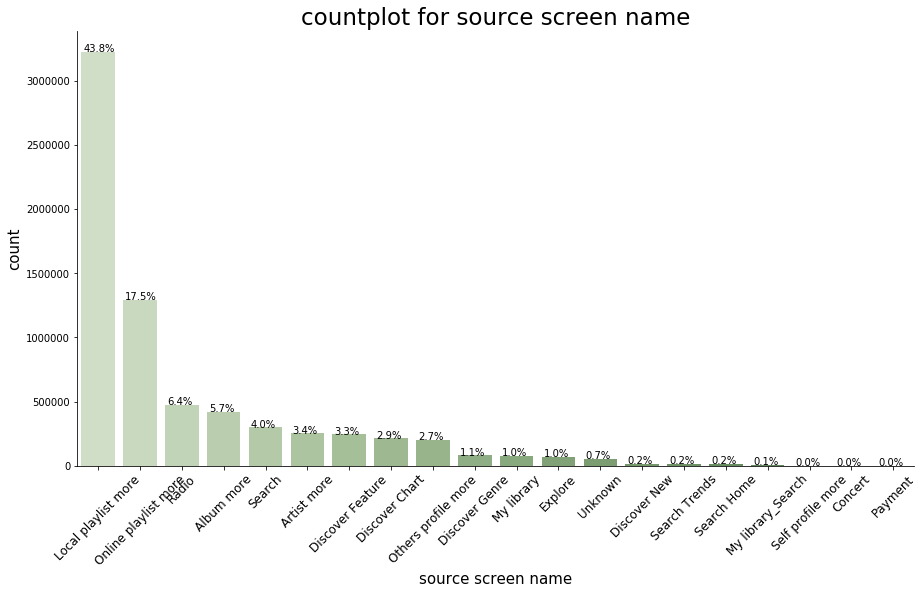

In [137]:
a = pd.DataFrame(df.groupby('source_screen_name').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_screen_name',y = 0, data = a, palette='ch:23.0,-.10,dark=.4')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('source screen name', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('countplot for source screen name', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim for source screen name</strong> : Plot for determining the distribution of Source screen name used by users in KKBox app while listening songs.

> <strong> Conclusion for source screen name : </strong> <br>1. 43.8% of the users are using local playlist for playing songs. <br> 2. we can also conclude that most of the users are specific about there songs as they don't even use my library search.

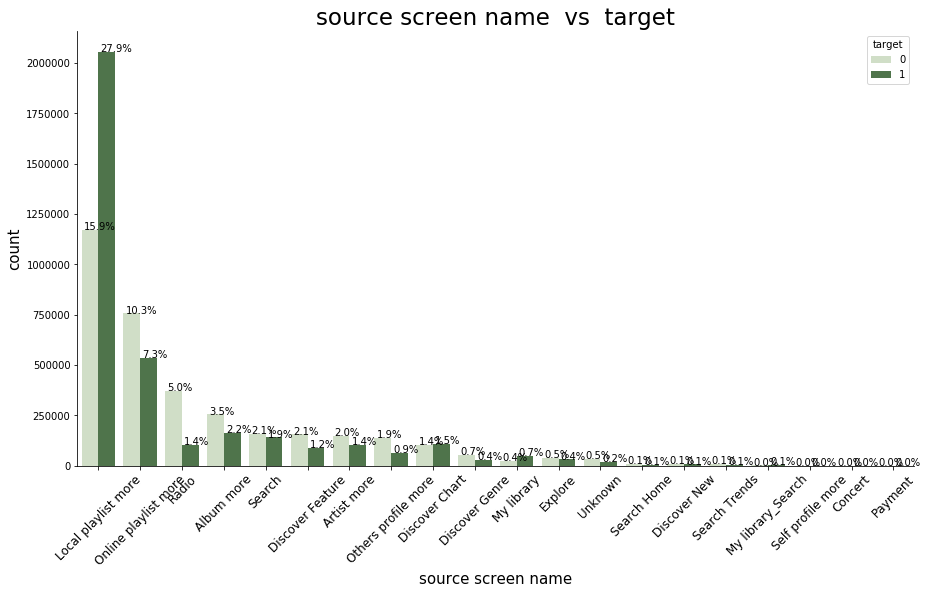

In [53]:
a = pd.DataFrame(df.groupby(['source_screen_name', 'target']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_screen_name',y = 0, hue = 'target', data = a, palette='ch:23.0,-.10,dark=.4')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('source screen name', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('source screen name  vs  target', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/df.shape[0]), (p.get_x()+0.05, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim for source screen name</strong> : Plot for determining the distribution of Source screen name used by users in KKBox app while listening songs with respect to variation in target variable.

> <strong>Conclusion for source screen name  vs  target : </strong> <br> 1. 27.9% of users listening songs repeatedly from Local Playlist. <br> 2. 5.0% of users Listening songs from radio where not listend more than once.

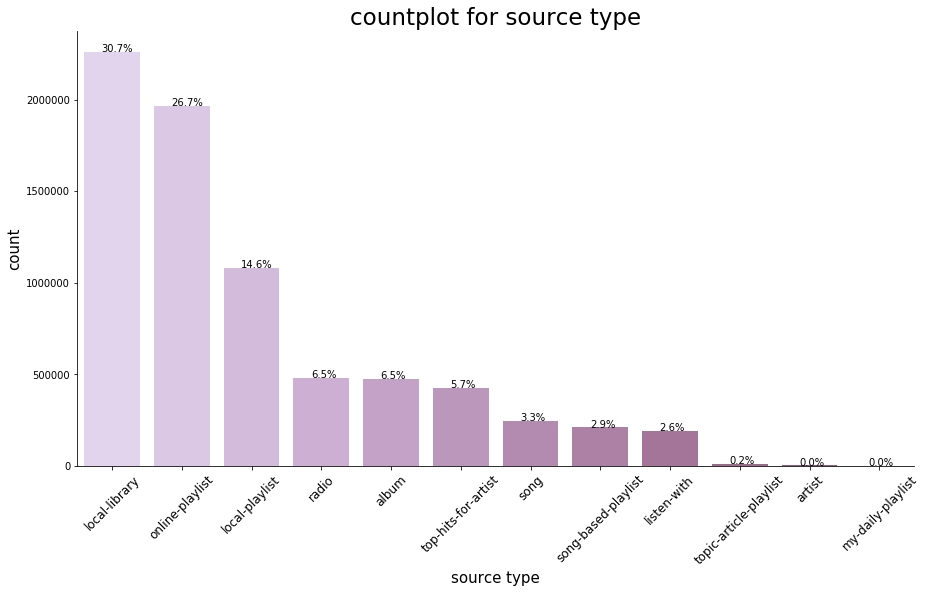

In [200]:
a = pd.DataFrame(df.groupby('source_type').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_type',y = 0, data = a, palette='ch:4.0,-.30,dark=.4')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('source type', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('countplot for source type', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/df.shape[0]), (p.get_x()+0.25, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim for source type</strong> : Plot for determining the distribution of Source type used by users in KKBox app while listening songs.

> <strong> Conclusion for source system type : </strong> <br>1. 72% of users are using app using local-library, online-playlist and local-playlist. 

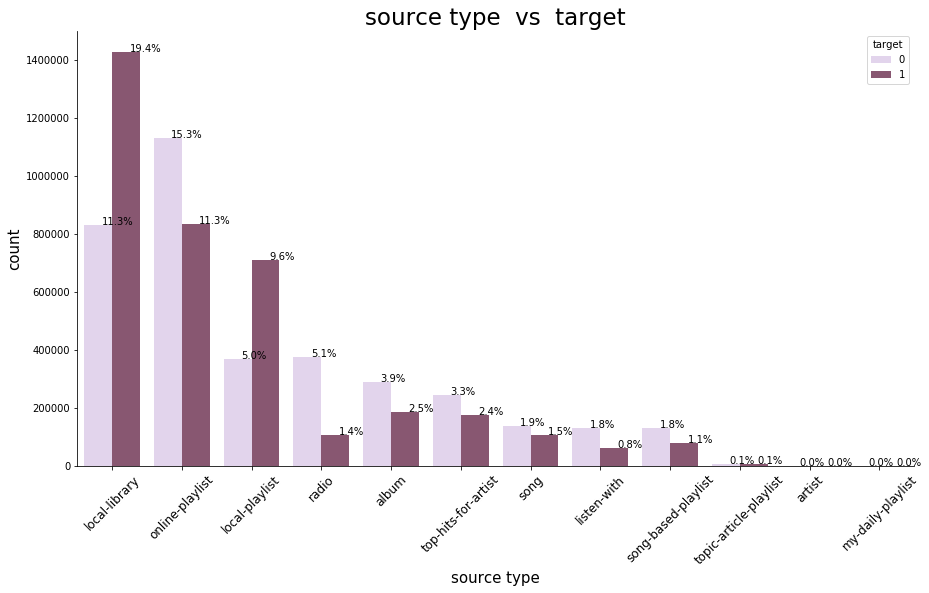

In [55]:
a = pd.DataFrame(df.groupby(['source_type', 'target']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'source_type',y = 0, data = a, hue = 'target', palette='ch:4.0,-.30,dark=.4')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('source type', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('source type  vs  target', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/df.shape[0]), (p.get_x()+0.25, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim for source type  vs  target</strong> : Plot for determining the distribution of Source type used by users in KKBox app while listening songs with respect to variation in target variable.

> <strong>Conclusion for source type  vs  target : </strong> <br> 1. 19.4% of users listening songs repeatedly from Local library. <br> 2. 5.1% of users Listening songs from radio where not listend more than once.

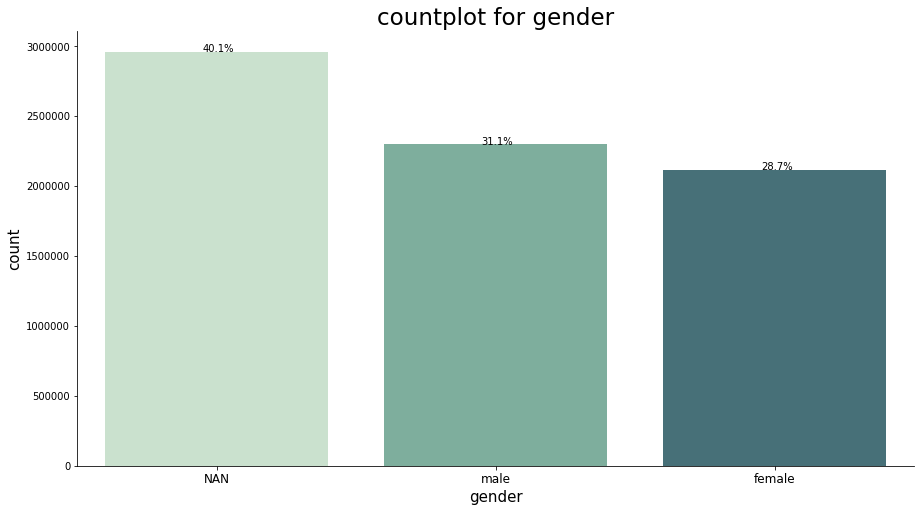

In [204]:
a = df['gender']
a.replace(np.nan, 'NAN',inplace = True)
a = pd.DataFrame(df.groupby('gender').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'gender',y = 0, data = a, palette='ch:3.0,-.40,dark=.4')
plt.xticks( fontsize = 12)
plt.xlabel('gender', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('countplot for gender', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/df.shape[0]), (p.get_x()+0.35, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim for gender</strong> : Plot for determining the distribution of genders of users.

> <strong> Conclusion for gender : </strong> <br> 1.There are majority of missing values. <br> 2. Nothing can be judged due to high missing value rate.

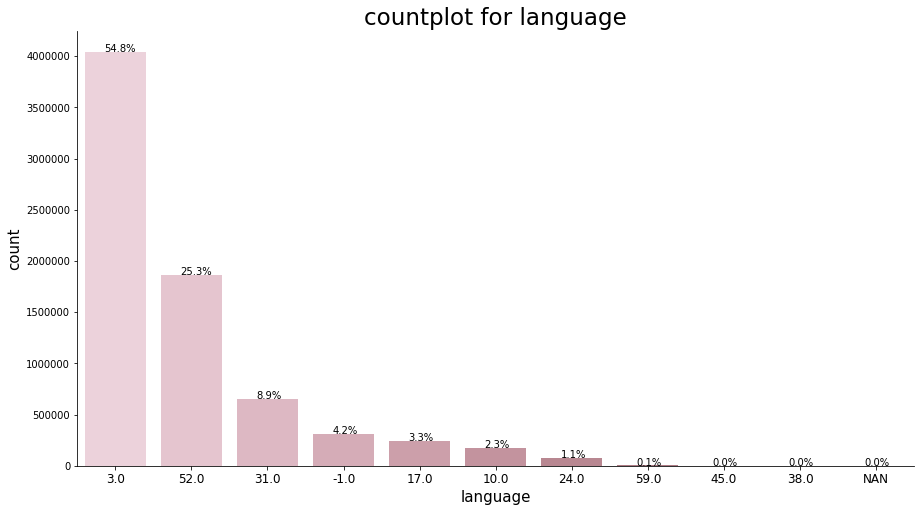

In [292]:
a = df['language']
a.replace(np.nan, 'NAN',inplace = True)
a = pd.DataFrame(df.groupby('language').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'language',y = 0, data = a, palette='ch:1.0,-.1,dark=.4')
plt.xticks( fontsize = 12)
plt.xlabel('language', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('countplot for language', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/df.shape[0]), (p.get_x()+0.25, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim for Language</strong> : Plot for determining the distribution of Language of songs most listened by users.

> <strong> Conclusion for Language : </strong> <br> 1. 54.8% of users have song language 3.0 <br> 2. It can be concluded that language 3.0 is local language of that region/country where the app is used.

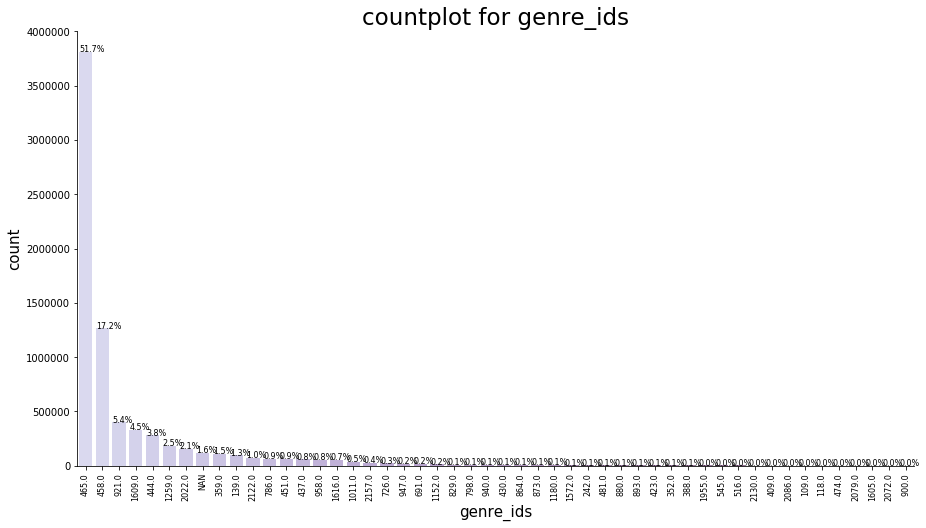

In [293]:
a = df['genre_ids']
a.replace(np.nan, 'NAN',inplace = True)
a = pd.DataFrame(df.groupby('genre_ids').size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a[:50]

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'genre_ids',y = 0, data = a, palette='ch:1.0,-.40,dark=.4')
plt.xticks(rotation = 90,  fontsize = 8)
plt.xlabel('genre_ids', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('countplot for genre_ids', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/df.shape[0]), (p.get_x()+0.01, p.get_height()+0.1), fontsize = 8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim for genre ids </strong> : Plot for determining the most liked genre id by users.

> <strong> Conclusion for genre ids : </strong> <br>1. 51.7% of users listen songs with genre id 465. 

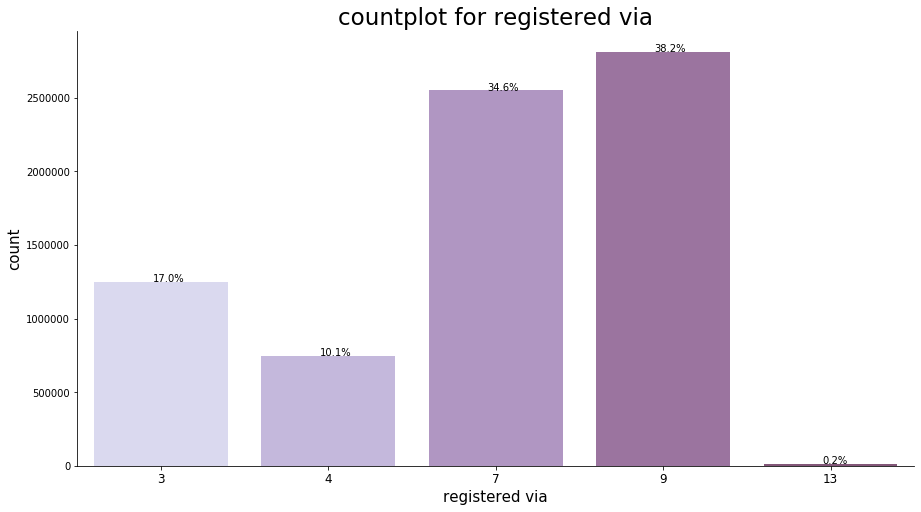

In [228]:
a = df['registered_via']
a.replace(np.nan, 'NAN',inplace = True)
a = pd.DataFrame(df.groupby('registered_via').size().reset_index())
a = a.sort_values(by = 0, ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'registered_via',y = 0, data = a, palette='ch:1.0,-.40,dark=.4')
plt.xticks( fontsize = 12)
plt.xlabel('registered via', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('countplot for registered via', fontdict = {'fontsize': 23})

for p in ax.patches:
        ax.annotate('{:.1f}%'.format( 100*p.get_height()/df.shape[0]), (p.get_x()+0.35, p.get_height()+0.5), fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

> <strong> Aim for registered via </strong> : Plot for determining the distribution of mode used by users for registering in KKBox app.

> <strong> Conclusion for registered via : </strong> <br> 1. 72.8% of users have registered via 7 and 9 registeration process.<br> 

<h2> 1.2 EDA Of Continuous Variables

count    7.377418e+06
mean     1.753927e+01
std      2.155447e+01
min     -4.300000e+01
25%      0.000000e+00
50%      2.100000e+01
75%      2.900000e+01
max      1.051000e+03
Name: bd, dtype: float64


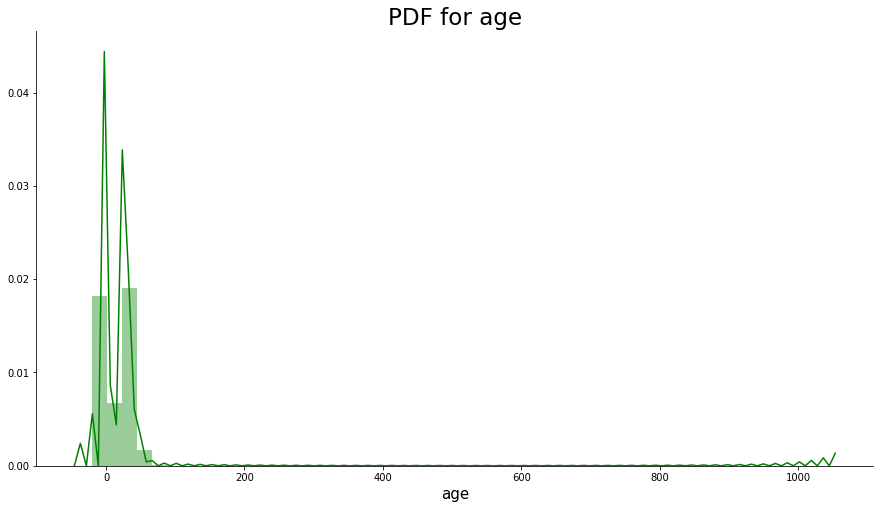

In [297]:
print(df['bd'].describe())
plt.figure(figsize = (15,8))
ax = sns.distplot(a = df['bd'], color='green')
plt.xlabel('age', fontdict = {'fontsize':15})
plt.title('PDF for age', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

count    7.377418e+06
mean     1.753927e+01
std      2.155447e+01
min     -4.300000e+01
25%      0.000000e+00
50%      2.100000e+01
75%      2.900000e+01
max      1.051000e+03
Name: bd, dtype: float64


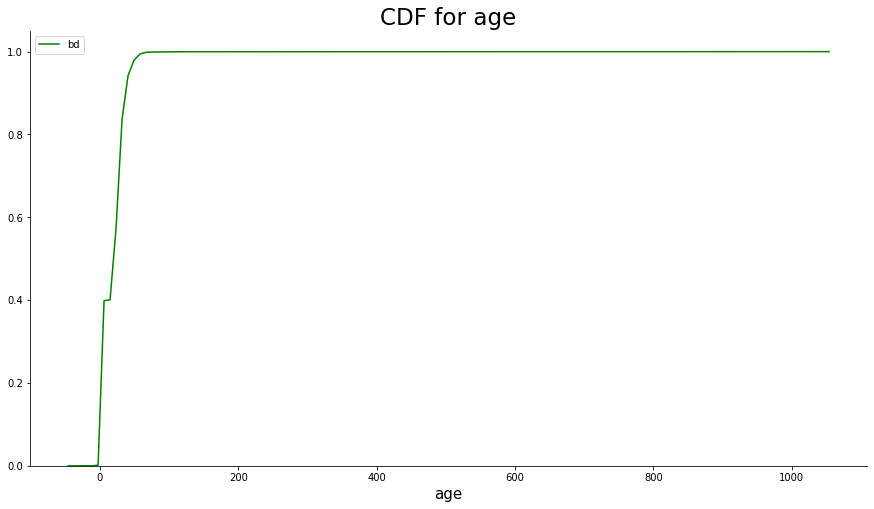

In [299]:
print(df['bd'].describe())
plt.figure(figsize = (15,8))
ax = sns.kdeplot(data = df['bd'], color='green', cumulative = True)
plt.xlabel('age', fontdict = {'fontsize':15})
plt.title('CDF for age', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [81]:
for i in range(0, 101, 10):
    print(str(i)+'th Percentile of age is '+str(np.nanpercentile(df['bd'], i)))
for i in range(90, 101, 1):
    print(str(i)+'th Percentile of age is '+str(np.nanpercentile(df['bd'], i)))
for i in [99.0, 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9, 100]:
    print(str(i)+'th Percentile of age is '+str(np.nanpercentile(df['bd'], i)))

0th Percentile of age is -43.0
10th Percentile of age is 0.0
20th Percentile of age is 0.0
30th Percentile of age is 0.0
40th Percentile of age is 15.0
50th Percentile of age is 21.0
60th Percentile of age is 24.0
70th Percentile of age is 27.0
80th Percentile of age is 30.0
90th Percentile of age is 36.0
100th Percentile of age is 1051.0
90th Percentile of age is 36.0
91th Percentile of age is 37.0
92th Percentile of age is 38.0
93th Percentile of age is 39.0
94th Percentile of age is 40.0
95th Percentile of age is 42.0
96th Percentile of age is 44.0
97th Percentile of age is 46.0
98th Percentile of age is 50.0
99th Percentile of age is 54.0
100th Percentile of age is 1051.0
99.0th Percentile of age is 54.0
99.1th Percentile of age is 55.0
99.2th Percentile of age is 55.0
99.3th Percentile of age is 56.0
99.4th Percentile of age is 58.0
99.5th Percentile of age is 59.0
99.6th Percentile of age is 60.0
99.7th Percentile of age is 63.0
99.8th Percentile of age is 66.0
99.9th Percentile 

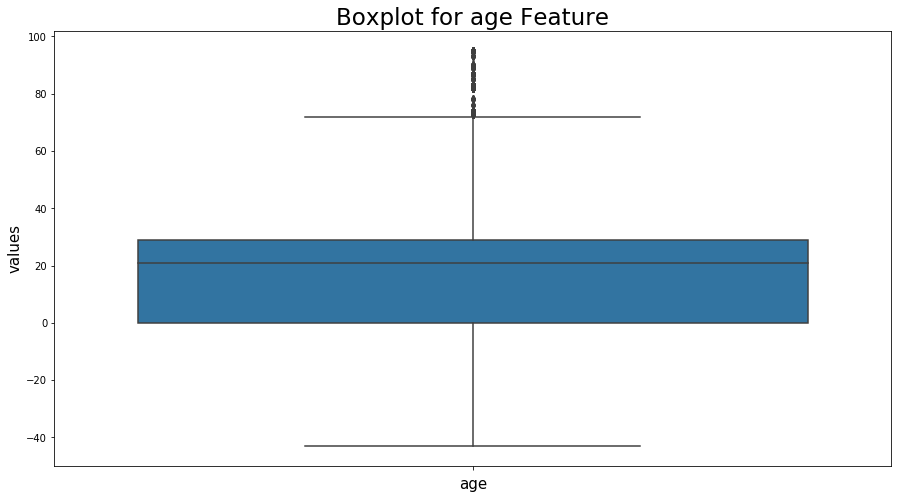

In [87]:
plt.figure(figsize = (15, 8))
a = df['bd'] >= 0
b = df['bd'] <= 100
a = df[a.values.tolist() and b.values.tolist()]
sns.boxplot(y = a['bd'])
plt.title('Boxplot for age Feature', fontdict = {'fontsize': 23})
plt.xlabel('age', fontdict = {'fontsize':15})
plt.ylabel('values', fontdict = {'fontsize':15})
plt.show()

> <strong>Aim for Age : </strong> Plot for determing the distribution of age feature.

> <strong>Conclusion for Age : </strong> <br> 1. Feature has outliers. <br> 2. Majority of values are lying between 0 to 100.

count    7.377304e+06
mean     2.451210e+05
std      6.734471e+04
min      1.393000e+03
25%      2.147260e+05
50%      2.418120e+05
75%      2.721600e+05
max      1.085171e+07
Name: song_length, dtype: float64


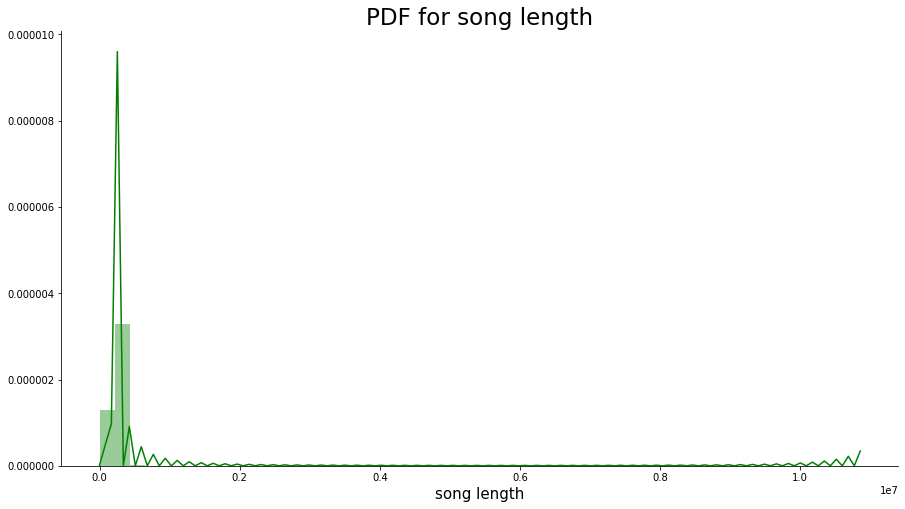

In [72]:
print(df['song_length'].describe())
plt.figure(figsize = (15,8))
ax = sns.distplot(a = df['song_length'], color='green')
plt.xlabel('song length', fontdict = {'fontsize':15})
plt.title('PDF for song length', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

count    7.377304e+06
mean     1.238304e+01
std      2.356609e-01
min      7.239215e+00
25%      1.227712e+01
50%      1.239592e+01
75%      1.251415e+01
max      1.619983e+01
Name: song_length, dtype: float64


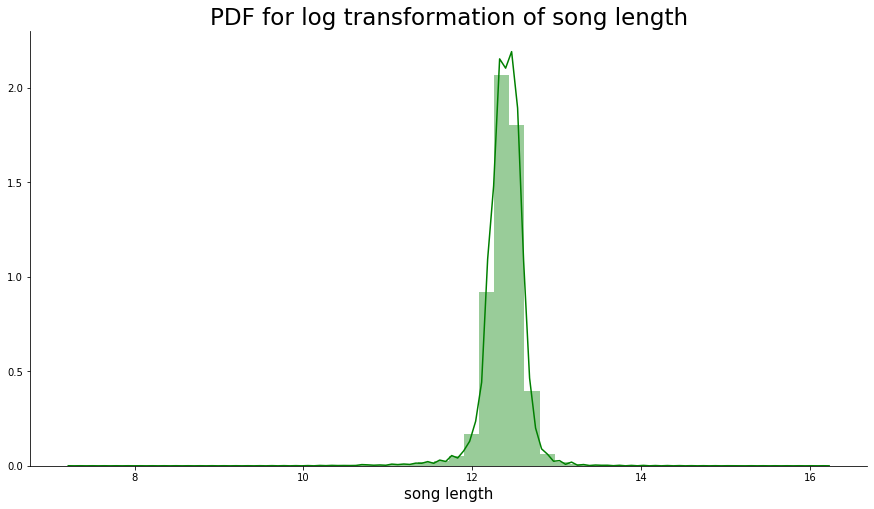

In [67]:
a = np.log(df['song_length'])
print(a.describe())
plt.figure(figsize = (15,8))
ax = sns.distplot(a = np.log(df['song_length']), color='green')
plt.xlabel('song length', fontdict = {'fontsize':15})
plt.title('PDF for log transformation of song length', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

count    7.377304e+06
mean     2.451210e+05
std      6.734471e+04
min      1.393000e+03
25%      2.147260e+05
50%      2.418120e+05
75%      2.721600e+05
max      1.085171e+07
Name: song_length, dtype: float64


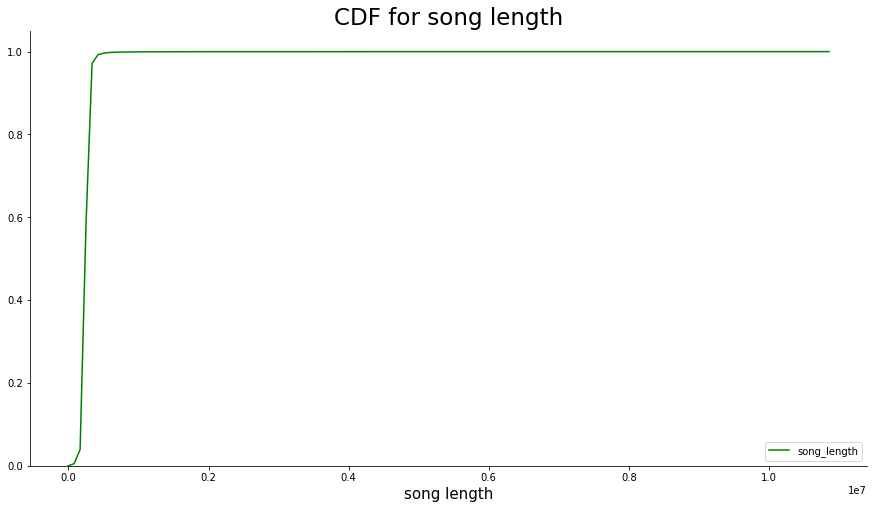

In [18]:
print(df['song_length'].describe())
plt.figure(figsize = (15,8))
ax = sns.kdeplot(data = df['song_length'], color='green', cumulative = True)
plt.xlabel('song length', fontdict = {'fontsize':15})
plt.title('CDF for song length', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [25]:
for i in range(0, 101, 10):
    print(str(i)+'th Percentile of song length is '+str(np.nanpercentile(df['song_length'], i)))
for i in range(90, 101, 1):
    print(str(i)+'th Percentile of song length is '+str(np.nanpercentile(df['song_length'], i)))

0th Percentile of song length is 1393.0
10th Percentile of song length is 191518.0
20th Percentile of song length is 208236.0
30th Percentile of song length is 220160.0
40th Percentile of song length is 231132.0
50th Percentile of song length is 241812.0
60th Percentile of song length is 253469.0
70th Percentile of song length is 265508.0
80th Percentile of song length is 279928.0
90th Percentile of song length is 298260.0
100th Percentile of song length is 10851706.0
90th Percentile of song length is 298260.0
91th Percentile of song length is 300826.0
92th Percentile of song length is 304227.0
93th Percentile of song length is 307983.0
94th Percentile of song length is 311902.0
95th Percentile of song length is 319190.0
96th Percentile of song length is 325465.0
97th Percentile of song length is 334471.0
98th Percentile of song length is 352653.0
99th Percentile of song length is 395947.0
100th Percentile of song length is 10851706.0


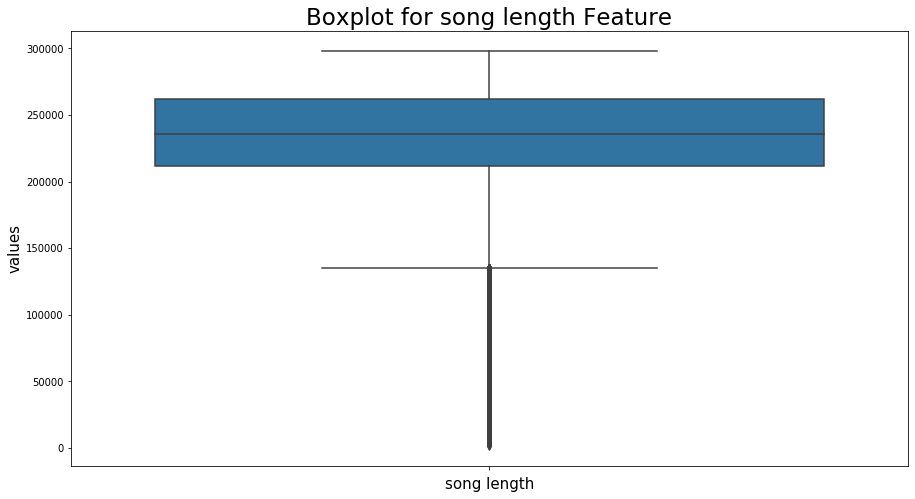

In [78]:
plt.figure(figsize = (15, 8))
a = df['song_length'] >= 191518
b = df['song_length'] <= 298260
a = df[a.values.tolist() and b.values.tolist()]
sns.boxplot(y = a['song_length'])
plt.title('Boxplot for song length Feature', fontdict = {'fontsize': 23})
plt.xlabel('song length', fontdict = {'fontsize':15})
plt.ylabel('values', fontdict = {'fontsize':15})
plt.show()

> <strong>Aim for Song Length :</strong> Plots for determing the distribution of lengths of songs.

> <strong>Conclusion for Song Length : </strong> <br> 1. Feature has outliers. <br> 2. song length are lying between 191518ms to 395947ms. <br> 3. Applying log transformation on song length makes sense in avoiding outliers.

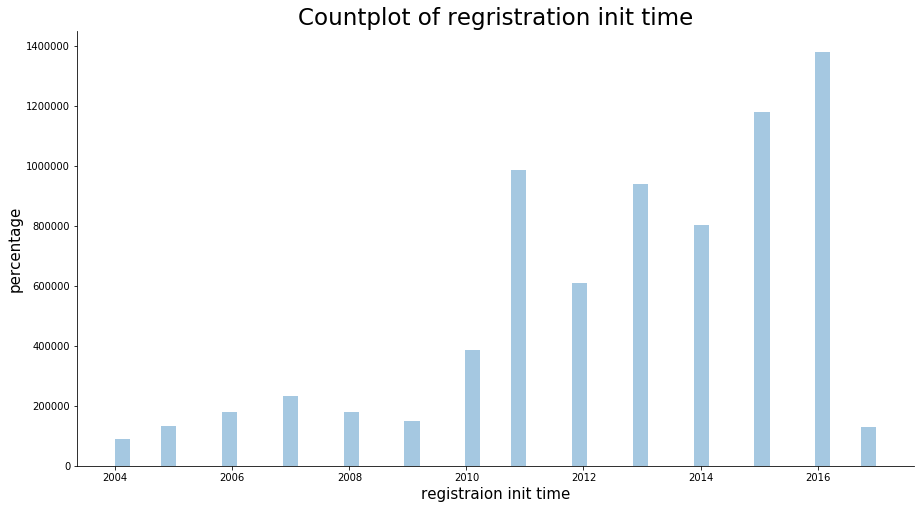

In [118]:
plt.figure(figsize = (15, 8))
ax = sns.distplot(df['registration_init_time'].astype(str).apply(lambda x: int(x[:4])), kde = False)
plt.title('Countplot of regristration init time', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('registraion init time', fontdict = {'fontsize':15})
plt.ylabel('percentage', fontdict = {'fontsize':15})
plt.show()

> <strong>Aim for registration init time : </strong> Plot for determing the distribution of when the users registers on KKBox app.

> <strong>Conclusion for registration init time : </strong> <br> 1. Registration of users increases as time passes.

count    7.377418e+06
mean     2.017157e+07
std      3.869831e+03
min      1.970010e+07
25%      2.017091e+07
50%      2.017093e+07
75%      2.017101e+07
max      2.020102e+07
Name: expiration_date, dtype: float64


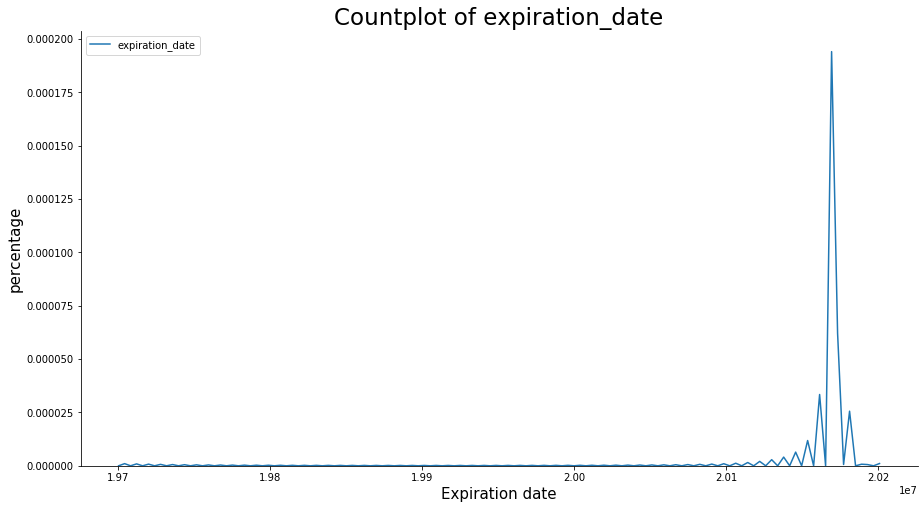

In [112]:
print(df['expiration_date'].describe())
plt.figure(figsize = (15, 8))
ax = sns.kdeplot(df['expiration_date'])
plt.title('Countplot of expiration_date', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Expiration date', fontdict = {'fontsize':15})
plt.ylabel('percentage', fontdict = {'fontsize':15})
plt.show()

> <strong>Aim for expiration date :</strong> Plot for determining the distribution of expiration date of plans of users.

> <strong>Conclusion for expiration date : </strong> <br>1. There are outliers in the features. <br> 2. Most of plans of users expiration are in the year of 2017.

# EDA on Feature Engineered Features

<h2> 1. Duration of subscription </h2>

In [20]:
a = pd.to_datetime(df['expiration_date'], format = '%Y%m%d') - pd.to_datetime(df['registration_init_time'], format = '%Y%m%d')
a =list(a)
a = [i.days for i in a]
df['membership_duration'] = a

count    7.377418e+06
mean     1.627961e+03
std      1.128673e+03
min     -1.619100e+04
25%      7.010000e+02
50%      1.433000e+03
75%      2.286000e+03
max      5.149000e+03
Name: membership_duration, dtype: float64


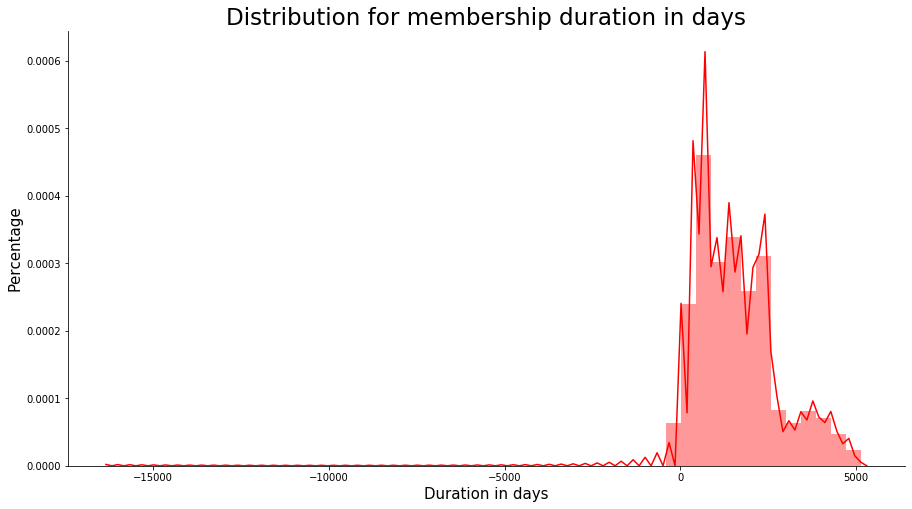

In [23]:
print(df['membership_duration'].describe())
plt.figure(figsize = (15,8))
ax = sns.distplot(a = df['membership_duration'], color='red')
plt.xlabel('Duration in days', fontdict = {'fontsize':15})
plt.ylabel('Percentage', fontdict = {'fontsize': 15})
plt.title('Distribution for membership duration in days', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

count    7.377418e+06
mean     1.627961e+03
std      1.128673e+03
min     -1.619100e+04
25%      7.010000e+02
50%      1.433000e+03
75%      2.286000e+03
max      5.149000e+03
Name: membership_duration, dtype: float64


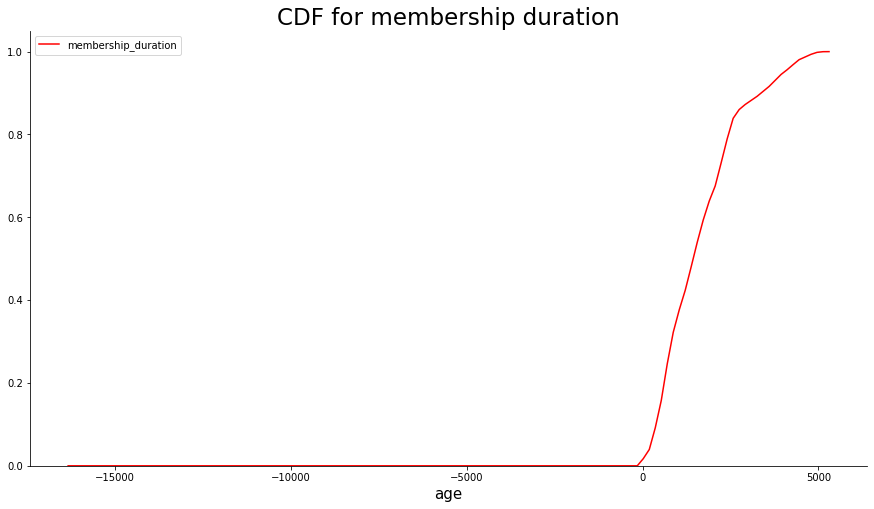

In [204]:
print(df['membership_duration'].describe())
plt.figure(figsize = (15,8))
ax = sns.kdeplot(data = df['membership_duration'], color='red', cumulative = True)
plt.xlabel('age', fontdict = {'fontsize':15})
plt.title('CDF for membership duration', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

> <strong>Aim for Duration in days :</strong> Plot for determining the distribution of duration in days of subscription.

> <strong>Conclusion for Duration in days : </strong> <br>1. There are outliers in the features. <br> 2. Range of membership duration varies from 0 to 5000.

In [190]:
a = pd.DataFrame(df['msno'].value_counts().reset_index())
a.rename(columns = {'index':'msno', 'msno':'song_count'}, inplace=True)
df = df.merge(a, how = 'left',on = 'msno')

count    7.371599e+06
mean     6.471541e+02
std      5.573472e+02
min      1.000000e+00
25%      2.860000e+02
50%      5.090000e+02
75%      8.360000e+02
max      5.537000e+03
Name: song_count, dtype: float64


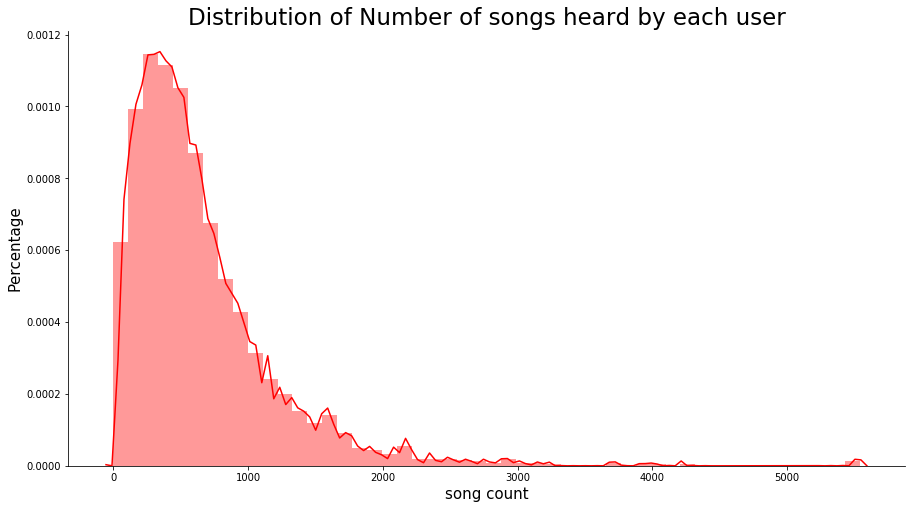

In [201]:
print(df['song_count'].describe())
plt.figure(figsize = (15,8))
ax = sns.distplot(a = df['song_count'], color='red')
plt.xlabel('song count', fontdict = {'fontsize':15})
plt.ylabel('Percentage', fontdict = {'fontsize': 15})
plt.title('Distribution of Number of songs heard by each user', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

count    7.371599e+06
mean     6.128115e+00
std      9.168676e-01
min      0.000000e+00
25%      5.655992e+00
50%      6.232448e+00
75%      6.728629e+00
max      8.619208e+00
Name: song_count, dtype: float64


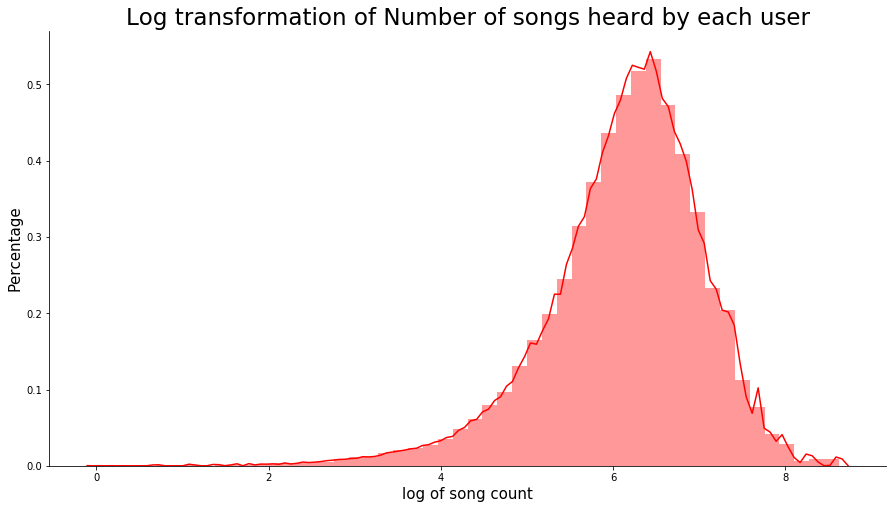

In [202]:
print(np.log(df['song_count']).describe())
plt.figure(figsize = (15,8))
ax = sns.distplot(a = np.log(df['song_count']), color='red')
plt.xlabel('log of song count', fontdict = {'fontsize':15})
plt.ylabel('Percentage', fontdict = {'fontsize': 15})
plt.title('Log transformation of Number of songs heard by each user', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

count    7.371599e+06
mean     6.471541e+02
std      5.573472e+02
min      1.000000e+00
25%      2.860000e+02
50%      5.090000e+02
75%      8.360000e+02
max      5.537000e+03
Name: song_count, dtype: float64


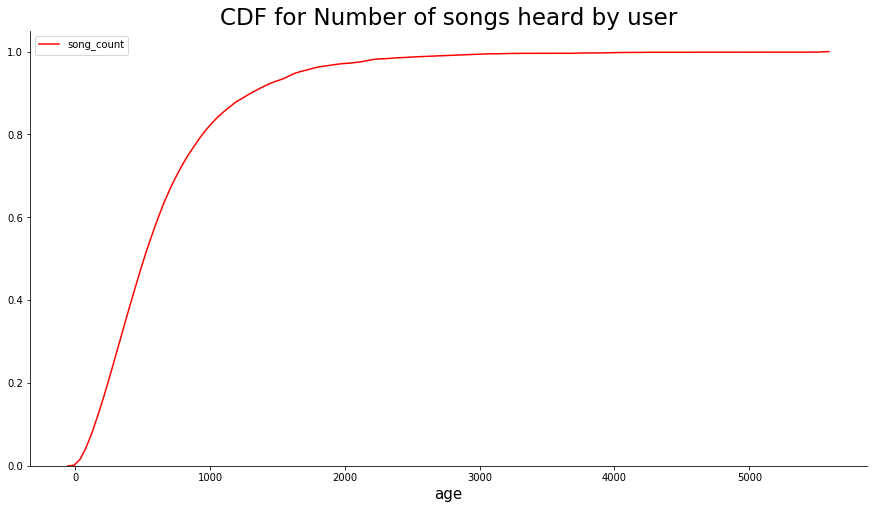

In [203]:
print(df['song_count'].describe())
plt.figure(figsize = (15,8))
ax = sns.kdeplot(data = df['song_count'], color='red', cumulative = True)
plt.xlabel('age', fontdict = {'fontsize':15})
plt.title('CDF for Number of songs heard by user', fontdict = {'fontsize': 23})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

> <strong>Aim for song count :</strong> Plot for determining the distribution of Number of songs heard by a particular user.

> <strong>Conclusion for song count : </strong> <br>1. There are some outliers. <br> 2. Log transformation of song count makes sense in avoiding outliers. <br> 3. Range of song count varies from 0 to 2500.

<h3>1. Create Embedding for Users and Songs </h3>

In [7]:
map_song_id = {key: id for id, key in enumerate(df.song_id.unique())}
map_msno = {key: id for id, key in enumerate(df.msno.unique())}

In [8]:
row = []
cols = []
ids = df['song_id'].values
ms = df['msno'].values
for i in range(df.shape[0]):
    song_id = ids[i]
    msno = ms[i]
    row.append(map_song_id[song_id])
    cols.append(map_msno[msno])
row = np.array(row)
cols = np.array(cols)

In [9]:
from scipy.sparse import csc_matrix
Y = csc_matrix((df.target.values, (row, cols)), dtype = np.int8)

In [10]:
def predict(df, emb_user, emb_song):
    df['prediction'] = np.sum(np.multiply(emb_song[df['song_id'].apply(lambda x: map_song_id[x])],emb_user[df['msno'].apply(lambda x: map_msno[x])]), axis=1)
    return df

In [11]:
lmbda = 0.0002
def cost(df, Y,emb_user, emb_anime):  
    predicted = predict(df, emb_user, emb_song)    
    predicted = csc_matrix((df.prediction.values, (row, cols)), dtype = np.int8)
    return np.sum((Y-predicted).power(2))/df.shape[0] 

In [12]:
def create_embeddings(n, K):
    return np.random.random((n, K))

In [14]:
def gradient(df, Y, emb_user, emb_song):
    predicted = predict(df, emb_user, emb_song)
    predicted = csc_matrix((df.prediction.values, (row, cols)), dtype = np.int8)
    delta = (Y-predicted)
    grad_user = (-2/df.shape[0])*(delta.T*emb_song) + 2*lmbda*emb_user
    grad_song = (-2/df.shape[0])*(delta*emb_user) + 2*lmbda*emb_song
    return grad_user, grad_song

In [15]:
emb_user = create_embeddings(30755, 30)
emb_song = create_embeddings(359966, 30)

In [16]:
beta = 0.9
grad_user, grad_song = gradient(df, Y,  emb_user, emb_song)
v_user = grad_user
v_song = grad_song
for i in range(500):
    grad_user, grad_song = gradient(df, Y, emb_user, emb_song)
    v_user = beta*v_user + (1-beta)*grad_user
    v_song = beta*v_song + (1-beta)*grad_song
    emb_user = emb_user - 1*v_user
    emb_song = emb_song - 1*v_song
    print("\niteration", i+1, ":")
    print("train mse:",  cost(df, Y, emb_user, emb_song))


iteration 1 :
train mse: 43.37502700809416

iteration 2 :
train mse: 42.910836013358605

iteration 3 :
train mse: 42.45490766552742

iteration 4 :
train mse: 42.004536953172504

iteration 5 :
train mse: 41.56056075445366

iteration 6 :
train mse: 41.123853087896066

iteration 7 :
train mse: 40.69462351191162

iteration 8 :
train mse: 40.27064496006597

iteration 9 :
train mse: 39.8566118932125

iteration 10 :
train mse: 39.4504421465613

iteration 11 :
train mse: 39.05086942342158

iteration 12 :
train mse: 38.65748897514008

iteration 13 :
train mse: 38.274843990133135

iteration 14 :
train mse: 37.8969231511621

iteration 15 :
train mse: 37.52631083124204

iteration 16 :
train mse: 37.16426329645412

iteration 17 :
train mse: 36.80839136402465

iteration 18 :
train mse: 36.458558807431004

iteration 19 :
train mse: 36.11678896329312

iteration 20 :
train mse: 35.782108726928584

iteration 21 :
train mse: 35.454441242179854

iteration 22 :
train mse: 35.13069504805069

iteration 23 :

train mse: 14.145817140902142

iteration 180 :
train mse: 14.084872105660816

iteration 181 :
train mse: 14.024021276820697

iteration 182 :
train mse: 13.963623994194174

iteration 183 :
train mse: 13.903299501261824

iteration 184 :
train mse: 13.843877221000627

iteration 185 :
train mse: 13.785208049753992

iteration 186 :
train mse: 13.72650702454436

iteration 187 :
train mse: 13.66787648469966

iteration 188 :
train mse: 13.609471633571529

iteration 189 :
train mse: 13.551747101763787

iteration 190 :
train mse: 13.494353308976121

iteration 191 :
train mse: 13.437200928563353

iteration 192 :
train mse: 13.380437708694288

iteration 193 :
train mse: 13.324469889058747

iteration 194 :
train mse: 13.268438361497207

iteration 195 :
train mse: 13.213258215814802

iteration 196 :
train mse: 13.157779998367992

iteration 197 :
train mse: 13.103039979570088

iteration 198 :
train mse: 13.048169969493392

iteration 199 :
train mse: 12.993816535812394

iteration 200 :
train mse: 12.9

train mse: 7.261036584886474

iteration 357 :
train mse: 7.236721438313513

iteration 358 :
train mse: 7.212524490275595

iteration 359 :
train mse: 7.18838433717596

iteration 360 :
train mse: 7.164218565357148

iteration 361 :
train mse: 7.1402779400597876

iteration 362 :
train mse: 7.11617099641094

iteration 363 :
train mse: 7.092459448549614

iteration 364 :
train mse: 7.06862089148263

iteration 365 :
train mse: 7.044926287218645

iteration 366 :
train mse: 7.021449238744504

iteration 367 :
train mse: 6.99816399179225

iteration 368 :
train mse: 6.97520433300648

iteration 369 :
train mse: 6.952043519833091

iteration 370 :
train mse: 6.928890839586424

iteration 371 :
train mse: 6.90632630549062

iteration 372 :
train mse: 6.883679222188576

iteration 373 :
train mse: 6.860979817057946

iteration 374 :
train mse: 6.838559235765142

iteration 375 :
train mse: 6.816067084717173

iteration 376 :
train mse: 6.793548230559797

iteration 377 :
train mse: 6.770905349269894

iteration

In [43]:
from tqdm import tqdm
df_user = []
for key in map_msno:
    val = map_msno[key]
    df_user.append([key] +list(emb_user[val]))

In [44]:
df_song = []
for key in map_song_id:
    val = map_song_id[key]
    df_song.append([key] +list(emb_song[val]))

In [48]:
df_user = pd.DataFrame(df_user)
df_song = pd.DataFrame(df_song)

df_user = df_user.rename(columns = {0: 'msno'})
df_song = df_song.rename(columns = {0: 'song_id'})

df_user.to_csv('user_embedding.csv')
df_song.to_csv('song_embedding.csv')

In [7]:
df_user = pd.read_csv('user_embedding.csv', index_col = 0)
df_song = pd.read_csv('song_embedding.csv', index_col = 0)

df = df.merge(df_user, how = 'left', on = 'msno')
df = df.merge(df_song, how = 'left', on = 'song_id')

<h3>2. Creating Expiration and registration year, Month, day </h3>
<h3>3. Creating Membership Duration </h3>

In [ ]:
df['expiration_year'] = df.expiration_date.astype(str).apply(lambda x: x[:4]).astype(np.uint16)
df['expiration_month'] = df.expiration_date.astype(str).apply(lambda x: x[4:6]).astype(np.uint8)
df['expiration_day'] = df.expiration_date.astype(str).apply(lambda x: x[6:]).astype(np.uint8)
df['registration_year'] = df.registration_init_time.astype(str).apply(lambda x: x[:4]).astype(np.uint16)
df['registration_month'] = df.registration_init_time.astype(str).apply(lambda x: x[4:6]).astype(np.uint8)
df['registration_day'] = df.registration_init_time.astype(str).apply(lambda x: x[6:]).astype(np.uint8)

a = list(pd.to_datetime(df['expiration_date'], format = '%Y%m%d') - pd.to_datetime(df['registration_init_time'], format = '%Y%m%d'))
df['membership_duration'] = [i.days for i in a]

df.drop(columns = ['expiration_date', 'registration_init_time'], inplace =True)

<h3>4. Creating Number of songs heard by users </h3>

In [ ]:
a = pd.DataFrame(df['msno'].value_counts().reset_index())
a.rename(columns = {'index':'msno', 'msno':'song_count'}, inplace=True)
df = df.merge(a, how = 'left',on = 'msno')
df['song_count'] = np.log(df['song_count'])
df.rename(columns = {'song_count':'log_song_count'}, inplace=True)

<h3> 4. Handling Outliers of age </h3>

In [ ]:
def clean(x):
    if x>=0 and x<=100:
        return x
    elif x <0:
        return 0
    elif x>100:
        return 100
df['bd'] = df.bd.apply(lambda x: clean(x)).astype(np.uint8)

<h3>5. Handling Most popular Genre id</h3>

In [ ]:
## most_popular_genre = ['465', '458', '921', '1609', '444', '1259', '2022', '359', '139']
def clean(x):
    b = re.findall('[0-9]+', x)
    if len(b) == 0:
        return np.nan
    if len(b) == 1:
        return int(b[0])
    if len(b)>1:
        for i in most_popular_genre:
            if i in b:
                return int(i)
        return b[0]
df['genre_ids'] = df['genre_ids'].astype(str).apply(lambda x: clean(x))
df['genre_ids'] = df['genre_ids'].astype(str).apply(lambda x: x if x in most_popular_genre else '0').astype(np.uint16)

In [ ]:
df.drop(columns = ['msno', 'song_id', 'artist_name'], inplace = True)

In [ ]:
Y = df['target']
x = df.drop(columns = ['target'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, random_state = 0, stratify = Y, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state = 0, stratify = y_train, test_size = 0.2)

<h3>6. Applying One Hot Encoding on categorical Feature</h3>

In [ ]:
categorical_features = ['source_system_tab', 'source_screen_name', 'source_type', 'city', 'registered_via', 'language', 'gender']
x_train_ohe = pd.get_dummies(x_train[categorical_features])
x_val_ohe = pd.get_dummies(x_val[categorical_features])
x_test_ohe = pd.get_dummies(x_test[categorical_features])

In [ ]:
x_train = pd.concat([x_train, x_train_ohe], axis = 1)
x_val = pd.concat([x_val, x_val_ohe], axis = 1)
x_test = pd.concat([x_test, x_test_ohe], axis = 1)
x_train.drop(columns = ['city', 'registered_via', 'language', 'source_system_tab', 'source_screen_name', 'source_type', 'gender'], inplace = True)
x_val.drop(columns = ['city', 'registered_via', 'language', 'source_system_tab', 'source_screen_name', 'source_type', 'gender'], inplace = True)
x_test.drop(columns = ['city', 'registered_via', 'language', 'source_system_tab', 'source_screen_name', 'source_type', 'gender'], inplace = True)

In [ ]:
x_train.drop(columns = ['composer', 'lyricist'], inplace = True)
x_val.drop(columns = ['composer', 'lyricist'], inplace = True)
x_test.drop(columns = ['composer', 'lyricist'], inplace = True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train['song_length'])
x_train['song_length'] = scaler.transform(x_train['song_length'].values.reshape(-1, 1))
x_val['song_length'] = scaler.transform(x_val['song_length'].values.reshape(-1, 1))
x_test['song_length'] = scaler.transform(x_test['song_length'].values.reshape(-1, 1))

<h3>7. Changing data type of feature to reduce space </h3>

In [ ]:
import numpy as np
x_train['bd'] = x_train['bd'].astype(np.uint8)
x_val['bd'] = x_val['bd'].astype(np.uint8)
x_test['bd'] = x_test['bd'].astype(np.uint8)

In [ ]:
x_train['genre_ids'] = x_train['genre_ids'].astype(np.uint16)
x_val['genre_ids'] = x_val['genre_ids'].astype(np.uint16)
x_test['genre_ids'] = x_test['genre_ids'].astype(np.uint16)

<h3>8. Changing missing values to median </h3>

In [ ]:
median = x_train['song_length'].median()
x_train['song_length'].fillna(median, inplace = True)
x_test['song_length'].fillna(median, inplace = True)
x_val['song_length'].fillna(median, inplace = True)

In [ ]:
x_train.to_csv('x_train.csv'), y_train.to_csv('y_train.csv')
x_test.to_csv('x_test.csv'), y_test.to_csv('y_test.csv')
x_val.to_csv('x_val.csv'), y_val.to_csv('y_val.csv')

# Feature Engineering Conclusion

> 1.Creating 30 Features of user embedding which helps in determining the user.<br> 2.Creating 30 Features of song embedding which helps in determing the song.<br>3.Creating 1 feature of Number of days of membership. <br>4.Creating 1 feature of Number of songs heard by user. <br> 5. Creating 6 features of Expiration and registration year, month and day of users.<br>6. Applying log Transformation of song count feature as it follows normal distribution.<br>7. keeping most popular genre id among all.<br>8. Applying one hot encoding to all categorical features.<br>9. Treating missing values as a new category and dropping it in applying one hot encoding for categorical features.<br>10. filling missing values as median value in continuous features.

# Modeling

In [10]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Percentage of misclassified points ",round((len(test_y)-np.trace(C))/len(test_y)*100, 3), '%')
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = [1,2]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [2]:
import dask.dataframe as pd
x_train = pd.read_csv('E:/x_train.csv')
x_test = pd.read_csv('x_test.csv')
x_val = pd.read_csv('x_val.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
y_val = pd.read_csv('y_val.csv')

In [24]:
import pandas as pd
test = pd.read_csv('x_val.csv', index_col = 0)

C:\Users\Vineet Mukesh Haswan\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [27]:
test.columns.tolist()

['bd',
 'song_length',
 'genre_ids',
 'artist_name_processed',
 '1_x',
 '2_x',
 '3_x',
 '4_x',
 '5_x',
 '6_x',
 '7_x',
 '8_x',
 '9_x',
 '10_x',
 '11_x',
 '12_x',
 '13_x',
 '14_x',
 '15_x',
 '16_x',
 '17_x',
 '18_x',
 '19_x',
 '20_x',
 '21_x',
 '22_x',
 '23_x',
 '24_x',
 '25_x',
 '26_x',
 '27_x',
 '28_x',
 '29_x',
 '30_x',
 '1_y',
 '2_y',
 '3_y',
 '4_y',
 '5_y',
 '6_y',
 '7_y',
 '8_y',
 '9_y',
 '10_y',
 '11_y',
 '12_y',
 '13_y',
 '14_y',
 '15_y',
 '16_y',
 '17_y',
 '18_y',
 '19_y',
 '20_y',
 '21_y',
 '22_y',
 '23_y',
 '24_y',
 '25_y',
 '26_y',
 '27_y',
 '28_y',
 '29_y',
 '30_y',
 'expiration_year',
 'expiration_month',
 'expiration_day',
 'registration_year',
 'registration_month',
 'registration_day',
 'membership_duration',
 'log_song_count',
 'source_system_tab_discover',
 'source_system_tab_explore',
 'source_system_tab_listen with',
 'source_system_tab_my library',
 'source_system_tab_notification',
 'source_system_tab_radio',
 'source_system_tab_search',
 'source_system_tab_settin

In [3]:
x_train = x_train.drop(columns = ['Unnamed: 0'])
x_test = x_test.drop(columns = ['Unnamed: 0'])
x_val = x_val.drop(columns = ['Unnamed: 0'])
y_train = y_train.drop(columns = ['Unnamed: 0'])
y_test = y_test.drop(columns = ['Unnamed: 0'])
y_val = y_val.drop(columns = ['Unnamed: 0'])

In [7]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")

<h2>1. Logistic Regression</h2>

AUC ROC Score for c =  1e-05 is 0.6647200724158513
AUC ROC Score for c =  0.0001 is 0.66066237329238
AUC ROC Score for c =  0.001 is 0.6648746192677282
AUC ROC Score for c =  0.01 is 0.6656384442856027
AUC ROC Score for c =  0.1 is 0.6650492350905566
AUC ROC Score for c =  1 is 0.6632797240083415
AUC ROC Score for c =  10 is 0.6639936211617927
AUC ROC Score for c =  100 is 0.6645825333981991
AUC ROC Score for c =  1000 is 0.6629217742893395


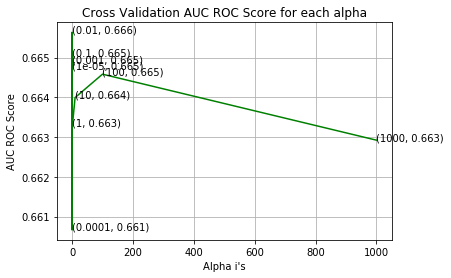

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
                               
alphas = [10 ** x for x in range(-5, 4)]
cv_logs = []
for i in alphas:
    regressor = LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    regressor.fit(x_train, y_train)
    sig_clf = CalibratedClassifierCV(regressor, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    y_pred = sig_clf.predict_proba(x_val)
    score = roc_auc_score(y_val, y_pred[:, 1])
    print ('AUC ROC Score for c = ',i,'is',score)
    cv_logs.append(score)

fig, ax = plt.subplots()
ax.plot(alphas, cv_logs,c='g')
for i, txt in enumerate(np.round(cv_logs,3)):
    ax.annotate((alphas[i],np.round(txt,3)), (alphas[i],cv_logs[i]))
plt.grid()
plt.title("Cross Validation AUC ROC Score for each alpha")
plt.xlabel("Alpha i's")                   
plt.ylabel("AUC ROC Score")
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

regressor = LogisticRegression(penalty='l2',C=0.01,class_weight='balanced')
regressor.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(regressor, method="sigmoid")
sig_clf.fit(x_train, y_train)

y_pred = sig_clf.predict_proba(x_train)
score = roc_auc_score(y_train, y_pred[:, 1])
print ('Train AUC ROC Score for c = ',0.01,'is',score)
y_pred = sig_clf.predict_proba(x_val)
score = roc_auc_score(y_val, y_pred[:, 1])
print ('validation AUC ROC Score for c = ',0.01,'is',score)
y_pred = sig_clf.predict_proba(x_test)
score = roc_auc_score(y_test, y_pred[:, 1])
print ('Test AUC ROC Score for c = ',0.01,'is',score)

Train AUC ROC Score for c =  0.01 is 0.6652841982097703
validation AUC ROC Score for c =  0.01 is 0.6647462700597071
Test AUC ROC Score for c =  0.01 is 0.6650204873576647


Percentage of misclassified points  37.531 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


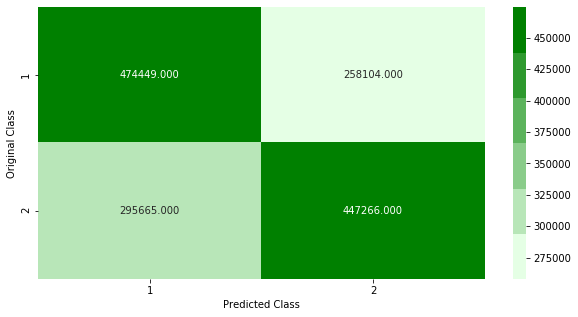

-------------------------------------------------- Precision matrix --------------------------------------------------


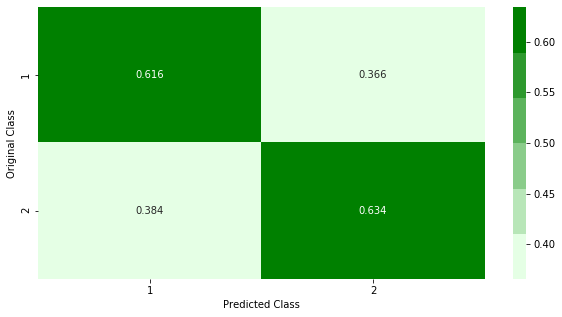

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


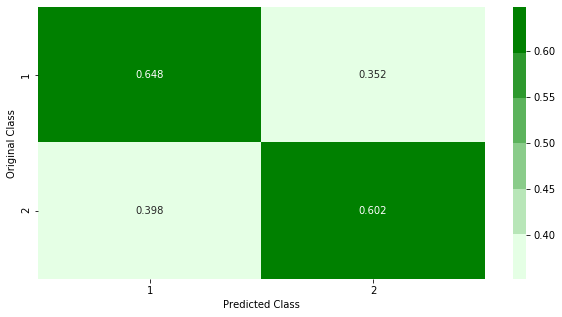

Sum of rows in precision matrix [1. 1.]


In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plot_confusion_matrix(y_test, sig_clf.predict(x_test))

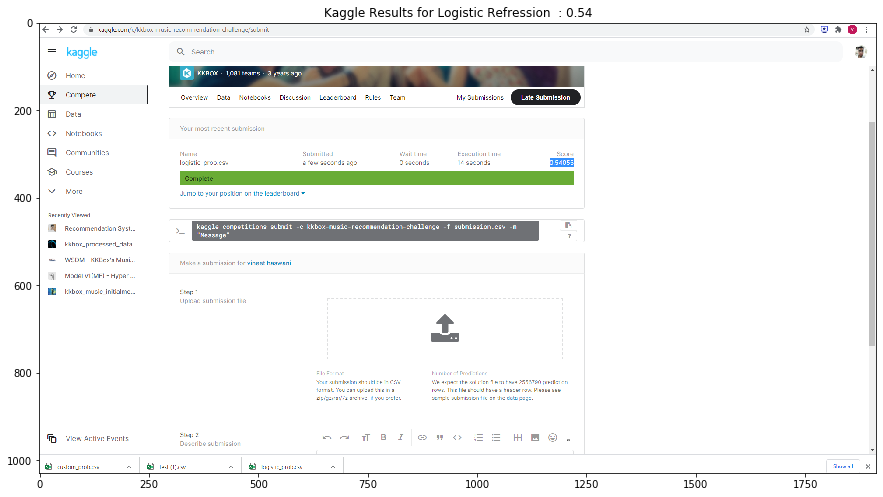

In [16]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize = (15, 20))
plt.title('Kaggle Results for Logistic Refression  : 0.54')
plt.imshow(cv2.cvtColor(cv2.imread('logistic Regression prob.png'), cv2.COLOR_BGR2RGB))

<h2>2. SGDClassifier with log loss </h2>

AUC ROC Score for c =  1e-05 is 0.6314927694977276
AUC ROC Score for c =  0.0001 is 0.6843973579421669
AUC ROC Score for c =  0.001 is 0.6641265100237393
AUC ROC Score for c =  0.01 is 0.6843594993560639
AUC ROC Score for c =  0.1 is 0.6802011765466669
AUC ROC Score for c =  1 is 0.647585506803966
AUC ROC Score for c =  10 is 0.5380404000104143
AUC ROC Score for c =  100 is 0.5129237882688955
AUC ROC Score for c =  1000 is 0.5067033561296438


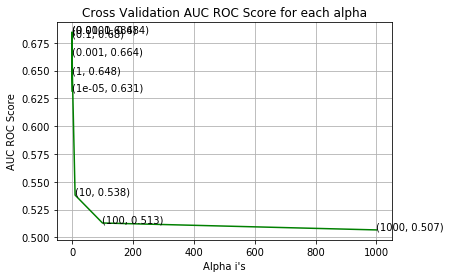

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
                               
alphas = [10 ** x for x in range(-5, 4)]
cv_logs = []
for i in alphas:
    regressor = SGDClassifier(penalty='l2',alpha=i,class_weight='balanced')
    regressor.fit(x_train, y_train)
    sig_clf = CalibratedClassifierCV(regressor, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    y_pred = sig_clf.predict_proba(x_val)
    score = roc_auc_score(y_val, y_pred[:, 1])
    print ('AUC ROC Score for c = ',i,'is',score)
    cv_logs.append(score)

fig, ax = plt.subplots()
ax.plot(alphas, cv_logs,c='g')
for i, txt in enumerate(np.round(cv_logs,3)):
    ax.annotate((alphas[i],np.round(txt,3)), (alphas[i],cv_logs[i]))
plt.grid()
plt.title("Cross Validation AUC ROC Score for each alpha")
plt.xlabel("Alpha i's")                   
plt.ylabel("AUC ROC Score")
plt.show()

In [7]:
regressor = SGDClassifier(penalty='l2',alpha=0.01,class_weight='balanced')
regressor.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(regressor, method="sigmoid")
sig_clf.fit(x_train, y_train)
y_pred = sig_clf.predict_proba(x_val)
score = roc_auc_score(y_val, y_pred[:, 1])
print ('validation AUC ROC Score for c = ',0.01,'is',score)
y_pred = sig_clf.predict_proba(x_test)
score = roc_auc_score(y_test, y_pred[:, 1])
print ('Test AUC ROC Score for c = ',0.01,'is',score)

validation AUC ROC Score for c =  0.01 is 0.6843594993560639
Test AUC ROC Score for c =  0.01 is 0.6846739588359931


Percentage of misclassified points  35.811 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


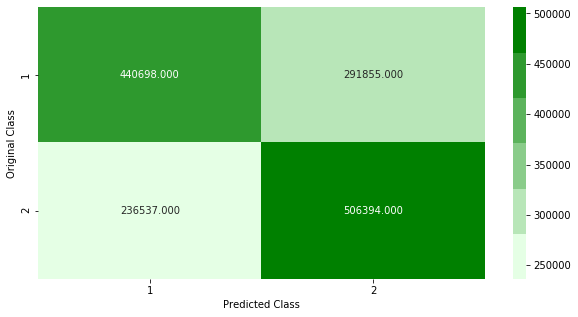

-------------------------------------------------- Precision matrix --------------------------------------------------


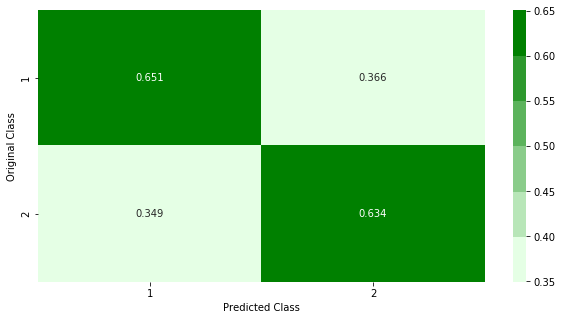

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


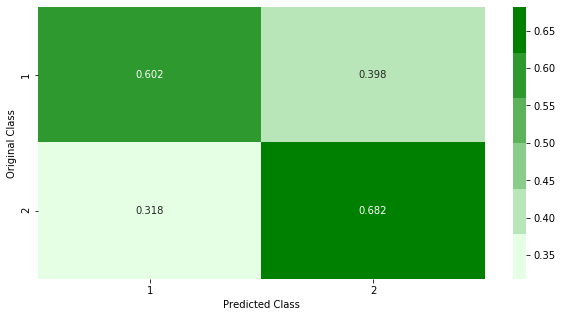

Sum of rows in precision matrix [1. 1.]


In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plot_confusion_matrix(y_test, sig_clf.predict(x_test))

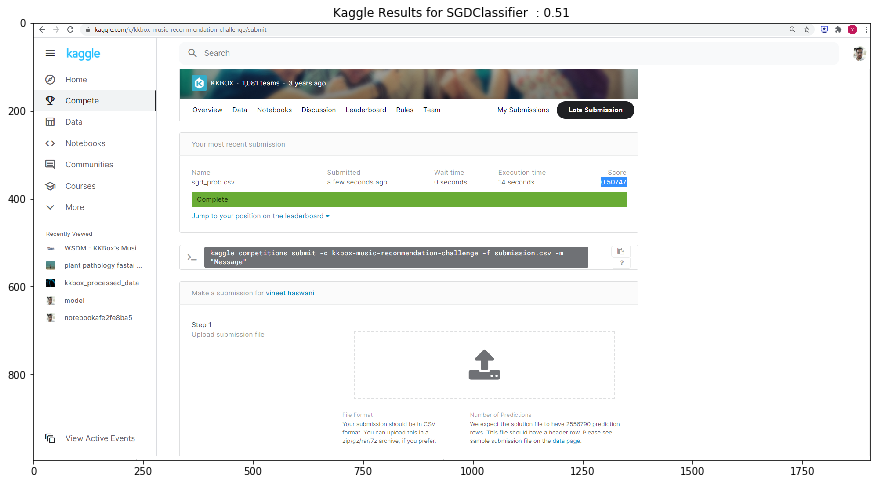

In [18]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize = (15, 20))
plt.title('Kaggle Results for SGDClassifier  : 0.51')
plt.imshow(cv2.cvtColor(cv2.imread('sgd_prob.png'), cv2.COLOR_BGR2RGB))

<h2>3. Decision Tree</h2>

AUC ROC Score for depth =  10 is 0.6845244398493214
AUC ROC Score for depth =  20 is 0.6907042320141951
AUC ROC Score for depth =  30 is 0.6517873490908819
AUC ROC Score for depth =  40 is 0.6187848824044917
AUC ROC Score for depth =  50 is 0.6164559012685721


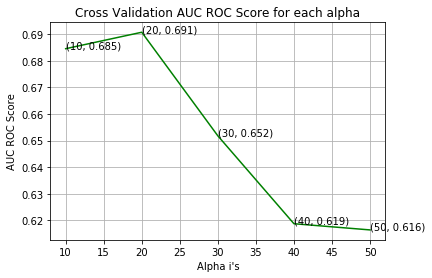

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

depth=[10, 20, 30, 40, 50]
cv_logs=[]
for i in depth:
    classifier=DecisionTreeClassifier(max_depth=i,random_state=42)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict_proba(x_val)
    score = roc_auc_score(y_val, y_pred[:, 1])
    print ('AUC ROC Score for depth = ',i,'is',score)
    cv_logs.append(score)

fig, ax = plt.subplots()
ax.plot(alphas, cv_logs,c='g')
for i, txt in enumerate(np.round(cv_logs,3)):
    ax.annotate((alphas[i],np.round(txt,3)), (alphas[i],cv_logs[i]))
plt.grid()
plt.title("Cross Validation AUC ROC Score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("AUC ROC Score")
plt.show()

In [13]:
classifier=DecisionTreeClassifier(max_depth=20,random_state=42)
classifier.fit(x_train, y_train)
y_pred = classifier.predict_proba(x_val)
score = roc_auc_score(y_val, y_pred[:, 1])
print ('validation AUC ROC Score for depth = ',20,'is',score)
y_pred = classifier.predict_proba(x_test)
score = roc_auc_score(y_test, y_pred[:, 1])
print ('Test AUC ROC Score for depth = ',20,'is',score)

validation AUC ROC Score for depth =  20 is 0.6907042320141951
Test AUC ROC Score for depth =  20 is 0.6924008796996413


Percentage of misclassified points  34.52 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


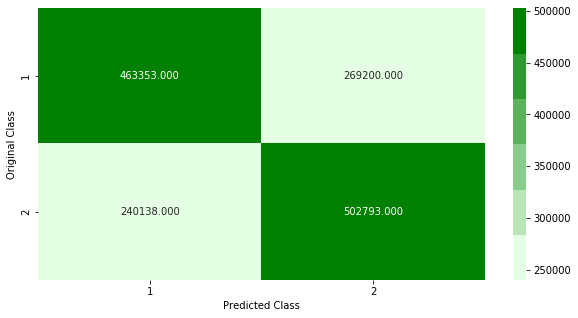

-------------------------------------------------- Precision matrix --------------------------------------------------


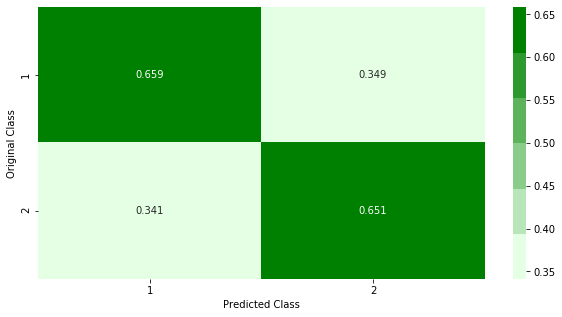

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


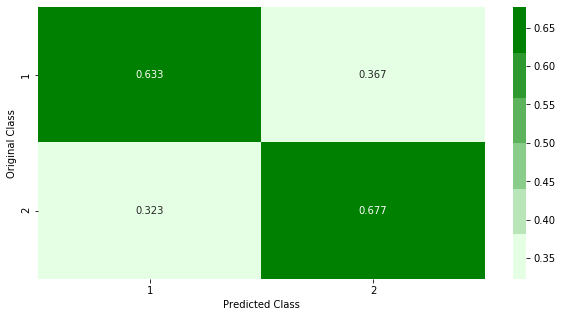

Sum of rows in precision matrix [1. 1.]


In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plot_confusion_matrix(y_test, classifier.predict(x_test))

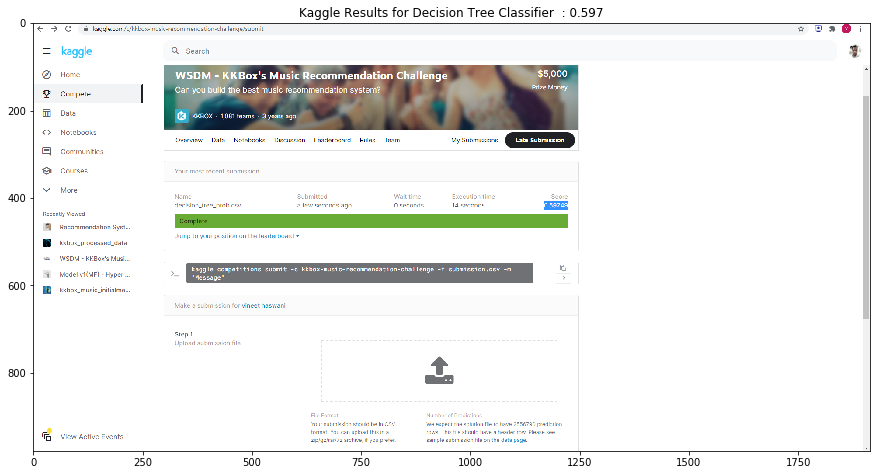

In [20]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize = (15, 20))
plt.title('Kaggle Results for Decision Tree Classifier  : 0.597')
plt.imshow(cv2.cvtColor(cv2.imread('Decision Tree prob.png'), cv2.COLOR_BGR2RGB))

<h2>4. Random Forest</h2>

AUC ROC Score for c =  10 is 0.736468057712352
AUC ROC Score for c =  50 is 0.7777900131752978
AUC ROC Score for c =  100 is 0.7848667134629947


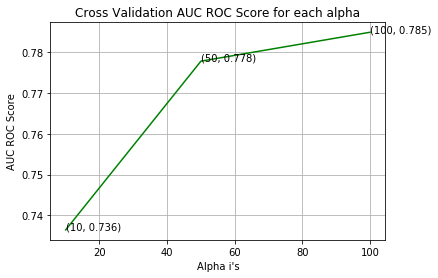

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

alphas=[10,50,100]
cv_logs=[]
for i in alphas:
    classifier=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict_proba(x_val)
    score = roc_auc_score(y_val, y_pred[:, 1])
    print ('AUC ROC Score for c = ',i,'is',score)
    cv_logs.append(score)

fig, ax = plt.subplots()
ax.plot(alphas, cv_logs,c='g')
for i, txt in enumerate(np.round(cv_logs,3)):
    ax.annotate((alphas[i],np.round(txt,3)), (alphas[i],cv_logs[i]))
plt.grid()
plt.title("Cross Validation AUC ROC Score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("AUC ROC Score")
plt.show()

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

classifier=RandomForestClassifier(n_estimators=100,random_state=42, n_jobs = 6)
classifier.fit(x_train, y_train)
y_pred = classifier.predict_proba(x_val)
score = roc_auc_score(y_val, y_pred[:, 1])
print ('validation AUC ROC Score for c = ',100,'is',score)
y_pred = classifier.predict_proba(x_test)
score = roc_auc_score(y_test, y_pred[:, 1])
print ('Test AUC ROC Score for c = ',100,'is',score)

validation AUC ROC Score for c =  100 is 0.7848667134629947
Test AUC ROC Score for c =  100 is 0.7856958254261837


Percentage of misclassified points  28.845 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


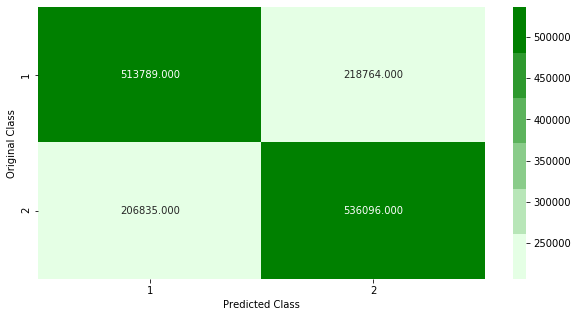

-------------------------------------------------- Precision matrix --------------------------------------------------


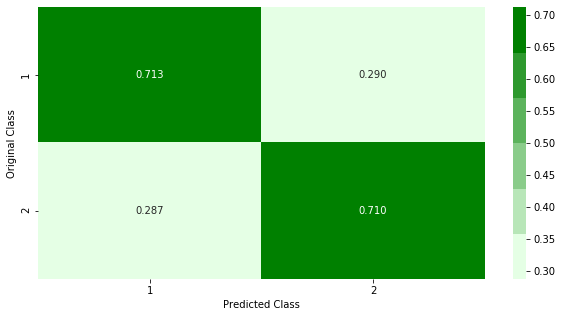

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


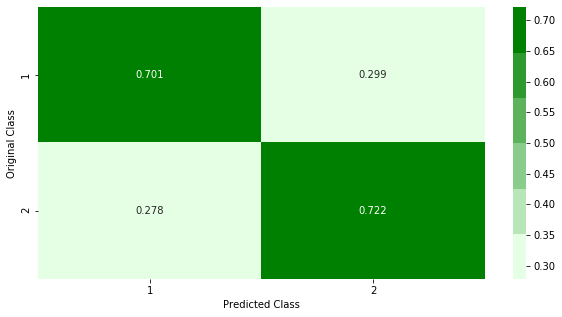

Sum of rows in precision matrix [1. 1.]


In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plot_confusion_matrix(y_test, classifier.predict(x_test))

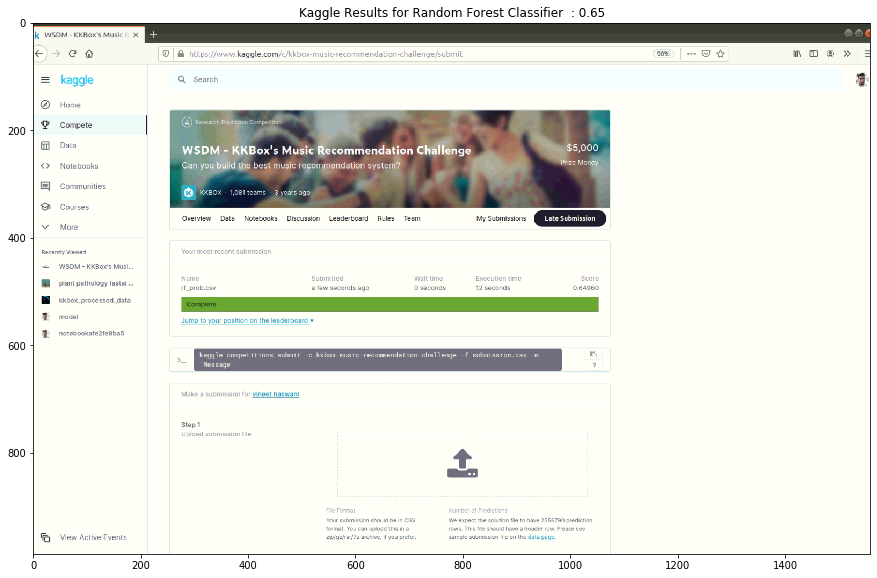

In [28]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize = (15, 20))
plt.title('Kaggle Results for Random Forest Classifier  : 0.65')
plt.imshow(cv2.cvtColor(cv2.imread('Random Forest prob.png'), cv2.COLOR_BGR2RGB))

<h2>5. AdaBoost </h2>

AUC ROC Score for c =  10 is 0.6672817891319418
AUC ROC Score for c =  50 is 0.6863191808701756
AUC ROC Score for c =  100 is 0.6902886908284588


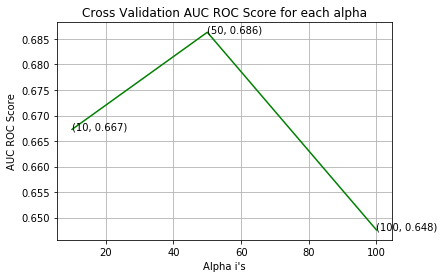

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

alphas=[10,50,100]
cv_logs=[]
for i in alphas:
    classifier=AdaBoostClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict_proba(x_val)
    score = roc_auc_score(y_val, y_pred[:, 1])
    print ('AUC ROC Score for c = ',i,'is',score)
    cv_logs.append(score)

fig, ax = plt.subplots()
ax.plot(alphas, cv_logs,c='g')
for i, txt in enumerate(np.round(cv_logs,3)):
    ax.annotate((alphas[i],np.round(txt,3)), (alphas[i],cv_logs[i]))
plt.grid()
plt.title("Cross Validation AUC ROC Score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("AUC ROC Score")
plt.show()

In [8]:
classifier=AdaBoostClassifier(n_estimators=50,random_state=42)
classifier.fit(x_train, y_train)
y_pred = classifier.predict_proba(x_train)

score = roc_auc_score(y_train, y_pred[:, 1])
print ('Train AUC ROC Score for c = ',50,'is',score)
y_pred = classifier.predict_proba(x_val)
score = roc_auc_score(y_val, y_pred[:, 1])
print ('validation AUC ROC Score for c = ',50,'is',score)
y_pred = classifier.predict_proba(x_test)
score = roc_auc_score(y_test, y_pred[:, 1])
print ('Test AUC ROC Score for c = ',50,'is',score)

Train AUC ROC Score for c =  50 is 0.6865621097439154
validation AUC ROC Score for c =  50 is 0.6863191808701756
Test AUC ROC Score for c =  50 is 0.6863646809616059


Percentage of misclassified points  35.741 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


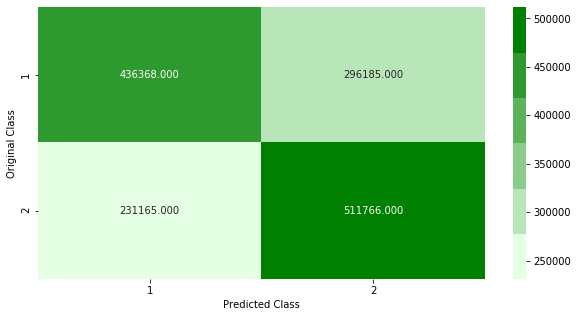

-------------------------------------------------- Precision matrix --------------------------------------------------


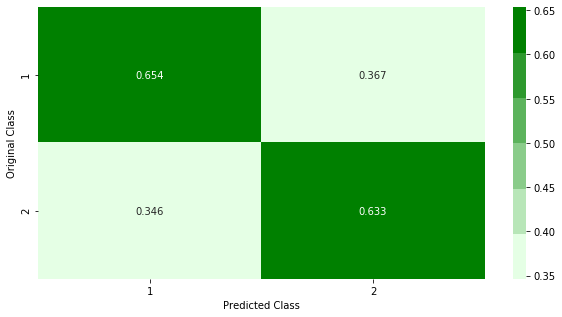

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


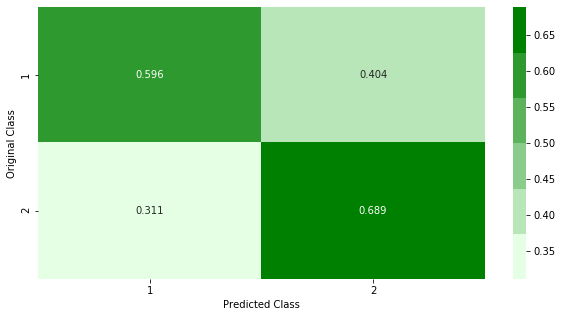

Sum of rows in precision matrix [1. 1.]


In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plot_confusion_matrix(y_test, classifier.predict(x_test))

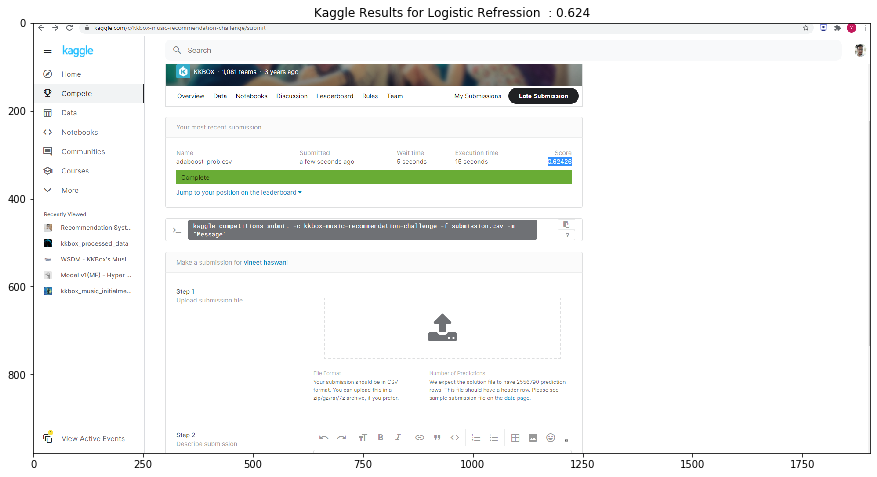

In [4]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize = (15, 20))
plt.title('Kaggle Results for Logistic Refression  : 0.624')
plt.imshow(cv2.cvtColor(cv2.imread('Adaboost prob.png'), cv2.COLOR_BGR2RGB))

<h2>6. XGBoost </h2>

AUC ROC Score for c =  10 is 0.6715350819922914
AUC ROC Score for c =  50 is 0.6890097897657351
AUC ROC Score for c =  100 is 0.6965871653598837
AUC ROC Score for c =  500 is 0.7135917108237587


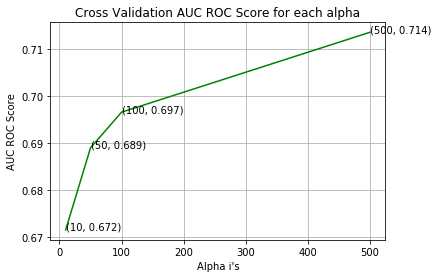

In [21]:
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

alpha=[10,50,100,500]
cv_logs=[]
for i in alpha:
    classifier=XGBClassifier(n_estimators=i,nthread=-1)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict_proba(x_val)
    score = roc_auc_score(y_val, y_pred[:, 1])
    print ('AUC ROC Score for c = ',i,'is',score)
    cv_logs.append(score)

fig, ax = plt.subplots()
ax.plot(alphas, cv_logs,c='g')
for i, txt in enumerate(np.round(cv_logs,3)):
    ax.annotate((alphas[i],np.round(txt,3)), (alphas[i],cv_logs[i]))
plt.grid()
plt.title("Cross Validation AUC ROC Score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("AUC ROC Score")
plt.show()

In [23]:
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

classifier=XGBClassifier(n_estimators=500,nthread=-1)
classifier.fit(x_train, y_train)

y_pred = sig_clf.predict_proba(x_val)
score = roc_auc_score(y_val, y_pred[:, 1])
print ('validation AUC ROC Score for c = ',0.01,'is',score)
y_pred = sig_clf.predict_proba(x_test)
score = roc_auc_score(y_test, y_pred[:, 1])
print ('Test AUC ROC Score for c = ',0.01,'is',score)

validation AUC ROC Score for c =  500 is 0.7135917108237587
Test AUC ROC Score for c =  500 is 0.7123181532419605


Percentage of misclassified points  33.832 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


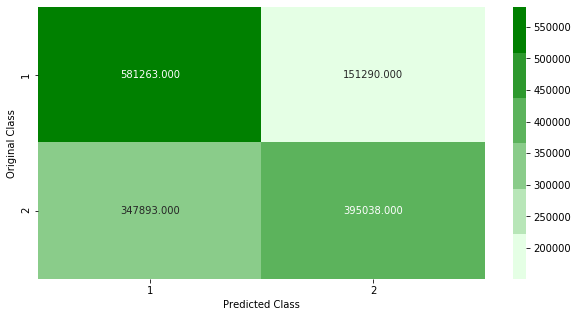

-------------------------------------------------- Precision matrix --------------------------------------------------


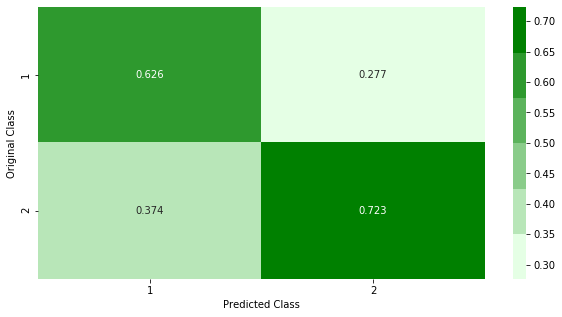

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


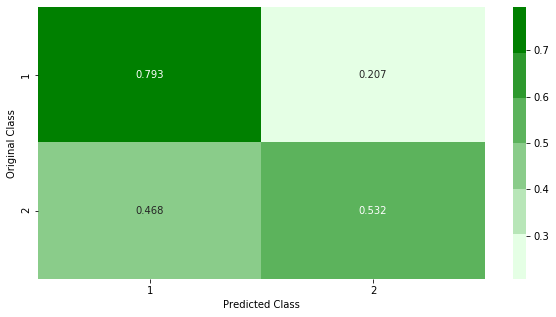

Sum of rows in precision matrix [1. 1.]


In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plot_confusion_matrix(y_test, classifier.predict(x_test))

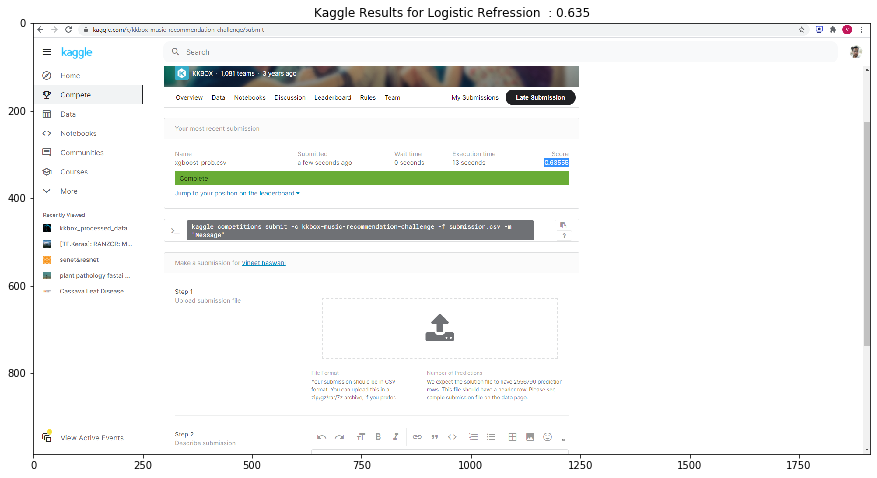

In [24]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize = (15, 20))
plt.title('Kaggle Results for Logistic Refression  : 0.635')
plt.imshow(cv2.cvtColor(cv2.imread('xgboost_prob.png'), cv2.COLOR_BGR2RGB))

<h3>7. Custom Ensemble Model </h3>

In [ ]:
import numpy as np
def generating_samples(input_data, target_data):
    selected_rows = np.sort(np.random.choice(input_data.shape[0], int(input_data.shape[0]*0.6), replace = True))
    
    sampled_input_data = input_data.iloc[selected_rows, :]
    sampled_target_data = target_data.iloc[selected_rows, :]
  
    return sampled_input_data , sampled_target_data, selected_rows

In [1]:
from scipy.stats import mode
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def custom_model(x_train, y_train, x_test, y_test, n_estimators = 10, alpha = 100, max_depth = 40):
    # x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.5, random_state = 0, stratify = y_train)
    d1_x_train, d2_x_train, d1_y_train, d2_y_train = train_test_split(x_train, y_train, test_size = 0.5, random_state = 0, stratify = y_train)
    predictions = []
    base_models = []
    for i in tqdm(range(n_estimators)):
        ## generating samples
        x, y, rows = generating_samples(d1_x_train, d1_y_train)
        ## training base model
        base_model = DecisionTreeClassifier(max_depth=max_depth,random_state=42)
        base_model.fit(x, y)
        pred = base_model.predict_proba(d2_x_train)[:, 1].reshape(-1, 1)
        predictions.append(pred)
        base_models.append(base_model)
    predictions = np.array(predictions).T
    predictions = predictions.reshape(-1, n_estimators)

    ## training meta model
    meta_model = LogisticRegression(penalty='l2',C=alpha,class_weight='balanced')
    meta_model.fit(predictions, d2_y_train)
    y_pred = meta_model.predict_proba(predictions)

    score = roc_auc_score(d2_y_train, y_pred[:, 1])
    print('AUC Score of Model on train set is :', score )

    ### Calculate AUC ROC Score on test set
    predictions = []
    for base_model in base_models:
        pred = base_model.predict_proba(x_test)[:, 1].reshape(-1, 1)
        predictions.append(pred)
    predictions = np.array(predictions).T
    predictions = predictions.reshape(-1, n_estimators)
    y_pred = meta_model.predict_proba(predictions)
    score = roc_auc_score(y_test, y_pred[:, 1])
    print('AUC Score of Model on test set is :', score )
    return base_models, meta_model, y_pred

base_models, meta_model, y_pred = custom_model(x_train, y_train, x_test, y_test, n_estimators = 100, alpha = 100, max_depth = 10)

AUC Score of Model on train set is : 0.6959068940143411
AUC Score of Model on test set is : 0.6961223438481663


Percentage of misclassified points  32.921 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


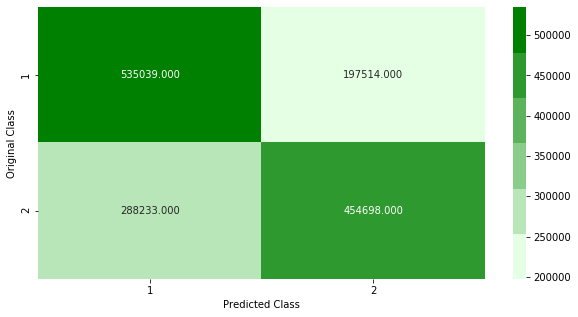

-------------------------------------------------- Precision matrix --------------------------------------------------


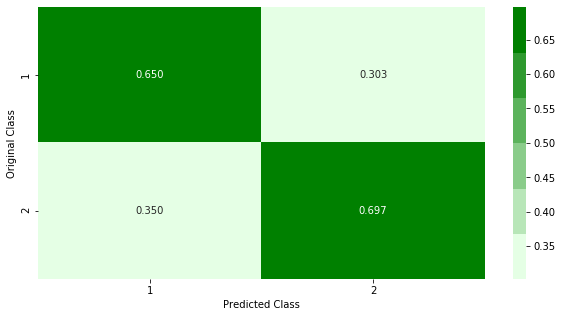

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


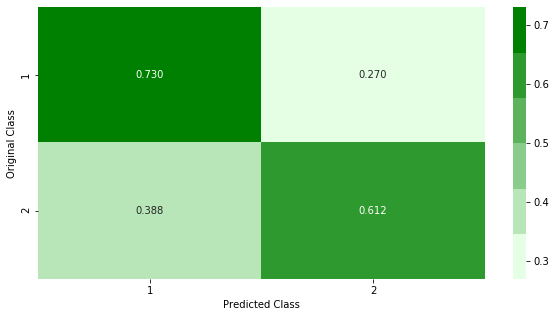

Sum of rows in precision matrix [1. 1.]


In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plot_confusion_matrix(y_test, y_pred[:, 1] >0.5)

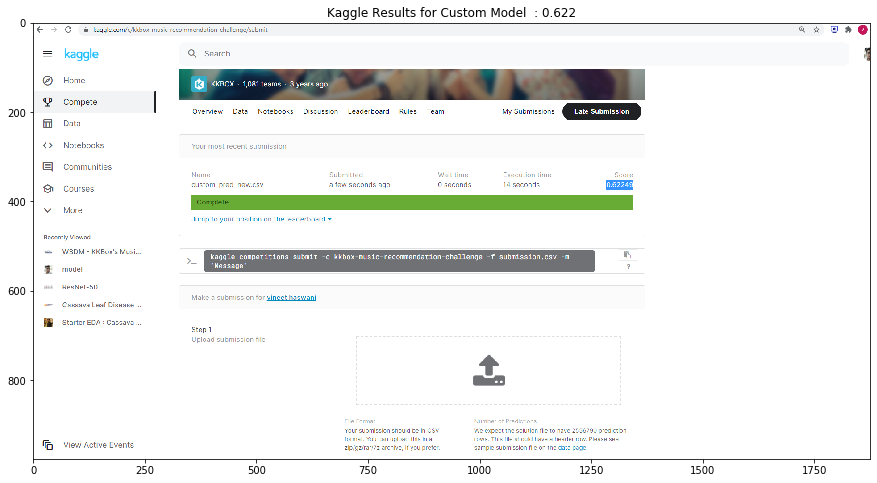

In [5]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize = (15, 20))
plt.title('Kaggle Results for Custom Model  : 0.622')
plt.imshow(cv2.cvtColor(cv2.imread('custom_prob.png'), cv2.COLOR_BGR2RGB))

# Conclusion for Modeling :

In [6]:
from prettytable import PrettyTable 
  
myTable = PrettyTable(["Model Name", "HyperParameter", "AUC Score on Test"]) 
myTable.add_row(["Logistic Regression", "alpha : 0.01", "66.50 %"]) 
myTable.add_row(["SGDClassifier with log loss", "alpha : 0.01", "68.46 %"]) 
myTable.add_row(["Decision Tree Classifier", "max_depth :20", "69.24 %"]) 
myTable.add_row(["Random Forest Classifier", "n_estimators : 100", "78.56 %"]) 
myTable.add_row(["AdaBoost Regression", "n_estimators : 50", "68.63 %"]) 
myTable.add_row(["XGBoost Classifier", "n_estimators : 500", "71.23 %"]) 
myTable.add_row(["Custom Model", "alpha :100 max_depth :40", "69.61 %"]) 

print(myTable)

+-----------------------------+--------------------------+-------------------+
|          Model Name         |      HyperParameter      | AUC Score on Test |
+-----------------------------+--------------------------+-------------------+
|     Logistic Regression     |       alpha : 0.01       |      66.50 %      |
| SGDClassifier with log loss |       alpha : 0.01       |      68.46 %      |
|   Decision Tree Classifier  |      max_depth :20       |      69.24 %      |
|   Random Forest Classifier  |    n_estimators : 100    |      78.56 %      |
|     AdaBoost Regression     |    n_estimators : 50     |      68.63 %      |
|      XGBoost Classifier     |    n_estimators : 500    |      71.23 %      |
|         Custom Model        | alpha :100 max_depth :40 |      69.61 %      |
+-----------------------------+--------------------------+-------------------+


Best Model is Random Forest classifier with number of trees as 100 with AUC Score of 78.56%. Further it can be improved by applying Calibration on top of classifier but it is very expensive to apply need more than 35 GB of ram for computation